# Marketing Suite Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for Marketing Suite in 2023 is 30024.2797 dollars. It is operating at a loss, with total net profit at -583.6261 dollars. This put Marketing Suite's profit margin at around -2 %.
>* Initial revenue growth is highest (278% in February), but constantly decrease with each month, where at December the CMGR is around 26% growth. On average, CMGR is around 38%.
>* On average, Marketing Suite have around 26 users each month, with 6 being active. There is a 91.5% likelihood of users churning in the next month. Based on total monthly data, as users don't stick around long, number of accounts and unit purchases fluctuate depending on the number of new users that month. On average, there is 4 new users each monthly period.
>
>Monthly Cohort Analysis
>* Initial active user range between 2 to 7, with no activity beyond the initial purchase. On occasion there would be a returning user in 1 or 2 months of the cohort's lifetime. Retention rates would drop to 0% at some point for all cohorts.
>* January cohort made one subsequent purchase amounting to 194.39% NDR in November. However, rates drop back to 0% in December.
>* There are many negative profit values. On a per user basis, cohorts in January, February, March, May, September, October, November, and December all contribute to losses on a per user basis. March cohort in particular, have 8 months in its lifetime contributing to loss, with each month on average losing about 69.5 in profit. Assuming all user in the cohort is active each month, this could possibly mean around 2k lost.
>
>Profitability
>* Positive profits consistently rise from January (71.9306) to peak in June (1022.7364). After June, they gradually decrease until October (349.4924), with a notable uptick in December (606.9615), possibly due to seasonal demand or aggressive discounting.
>* Decline in positive profits from July to October aligns with the rise in negative profits, suggesting that factors negatively affecting overall profitability become more pronounced during these months. Negative profits start increasing from July (1.7442), peaking in December (306.1014). Significant increments are seen in August (23.5764), September (191.7996), and October (232.2816), potentially driven by higher marketing costs or reduced customer engagement during these months.
>
>Discounting EDA
>* There is 76 invoices for Marketing Suite in 2023, 56 of which were applied discounts (~74%). With more discounted orders, this suggests discounts are a significant aspect of the sales strategy for Marketing Suite. It relies on discounts to drive sales, which could be impacting overall profitability.
>* After discounts, overall profits turn negative in multiple months: April (from 432.8590 to -8.4562), May (from 364.2538 to -231.5776), August (from 18.0792 to -102.4224), September (from 310.1925 to -150.5328), October (from 117.2108 to -332.8318), November (from 276.4661 to -194.1442), and December (from 300.8601 to -366.7888).
>* About 82% of orders fall within the 10-30% discount range, indicating this range is effective at attracting customers without excessive discounting.
>* A 15% discount is generally the most profitable, while higher discounts consistently lead to losses.
>* High discounts (50% and 70%) on a small number of orders significantly impact overall profitability, especially for high-value items. However, high discounts might be used to introduce big clients to the more profitable Marketing Suite-Gold, despite initial losses.
>
>Ideal Customer Profile (ICP) EDA
>* SMB segment, while hugely dominant with 63.16% of Total Accounts, needs special attention to address its negative net profit (-300) despite an Undiscounted Net Profit of 2,454.2. The Strategic segment also requires focus, holding 26.32% of Total Accounts with a negative net profit of -350 and an Undiscounted Net Profit of 1,072.2. The Enterprise segment, with 10.53% of Total Accounts, is performing well with a positive net profit of 171.5 and an Undiscounted Net Profit of 632.0. Prioritize enhancing profitability in the SMB and Strategic segments, while maintaining the performance of the Enterprise segment.
>* In the SMB segment, high-performing industries include Tech in APJ, Transportation in AMER, and Energy in AMER. However, some industries like Communications, Finance, and Healthcare in EMEA contribute significant losses. Key improvements and efficiency measures are needed to mitigate these losses.
>* In the Strategic segment, top-performing industries are Healthcare in EMEA and Finance in AMER. However, Tech and Energy, particularly in EMEA and AMER, face significant losses. 
>* In the Enterprise segment, Manufacturing in AMER leads with substantial profits, while Tech in AMER shows losses. Overall, gains in the Enterprise segment outweigh the losses, but addressing underperformance in some industries remains crucial.
>* AMER demonstrates robust sales and net profits, especially in June and October, but suffers from significant discount impacts, leading to lower net profits in various months. AMER is the highest earner overall.
>* EMEA exhibits strong sales in May, September, and December, but faces significant negative impacts from discounts, particularly in October and December.
>* APJ shows strong sales in March, May, and September, but frequently experiences negative net profits due to substantial discounts in several months.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [3]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [4]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [5]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [6]:
#slice main df by product first
prod9 = df.query("Product == 'Marketing Suite'")
# then slice product df by year of analysis
prod9_2023=prod9.query('year == 2023')

----

### General Performance Report

In [17]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod9_2023['reg_date'] = prod9_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_13336\3125310125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod9_2023['reg_date'] = prod9_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [18]:
# make a user df, from the product df
prod9_2023_user = prod9_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [19]:
# from user df, extract month datetime data, from date of first purchase
prod9_2023_user['reg_month']= prod9_2023_user['reg_date'].values.astype('datetime64[M]')

In [20]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod9_2023_user['key'] = 1
prod9_2023_user = template_table.merge(prod9_2023_user,on='key')
prod9_2023_user =prod9_2023_user.drop('key',axis=1)

In [21]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod9_2023_user = prod9_2023_user[prod9_2023_user['Month']>=prod9_2023_user['reg_month']]

In [22]:
prod9_2023['Month'] = prod9_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod9_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod9_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod9_2023_user = prod9_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod9_2023_user = prod9_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_13336\728657537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod9_2023['Month'] = prod9_2023['Order Date'].values.astype('datetime64[M]')


In [23]:
prod9_2023_user['user'] = 1    
prod9_2023_user['new user'] = (prod9_2023_user['reg_month'] == prod9_2023_user['Month']) * 1 
prod9_2023_user['active'] = (prod9_2023_user['Sales'] > 0) * 1   
prod9_2023_user['active_prev'] = (prod9_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod9_2023_user['change_status'] = (prod9_2023_user['active'] != prod9_2023_user['active_prev']) * 1
prod9_2023_user['session_id'] = (prod9_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod9_2023_user['inactive'] = (prod9_2023_user['active'] == 0) * 1
prod9_2023_user['month_inactive'] = (prod9_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [14]:
#Marketing Suite monthly user report (2023)
prod9_2023_report = prod9_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod9_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,4.0000,2.0000,297.9200,297.9200,71.9306,71.9306,2,2,2
2023-02-01,12.0000,5.0000,1125.7234,972.0839,268.5001,114.8606,7,5,5
2023-03-01,9.0000,3.0000,1722.8600,1343.8802,421.5562,42.5764,10,3,3
2023-04-01,37.0000,8.0000,2183.8364,1742.5212,432.8590,-8.4562,16,6,8
2023-05-01,39.0000,9.0000,3732.1332,3136.3018,364.2538,-231.5776,22,6,9
2023-06-01,36.0000,9.0000,4873.0737,4158.3948,1022.7364,308.0575,27,5,8
2023-07-01,16.0000,5.0000,2136.2740,1848.1444,553.8322,265.7026,30,3,5
2023-08-01,7.0000,3.0000,460.0920,339.5904,18.0792,-102.4224,30,0,2
2023-09-01,23.0000,7.0000,3635.8560,3175.1307,310.1925,-150.5328,34,4,7


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [16]:
prod9_2023_churn = prod9_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod9_2023_churn['old active'] = (prod9_2023_churn['active'] - prod9_2023_churn['new user'])
prod9_2023_churn['user churn'] = ((1 - (prod9_2023_churn['old active'] / prod9_2023_churn['user'].shift(1))) * 100).round()
prod9_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,297.9200,71.9306,2,2,2,0,NaN
2023-02-01,1125.7234,114.8606,7,5,5,0,100.0000
2023-03-01,1722.8600,42.5764,10,3,3,0,100.0000
2023-04-01,2183.8364,-8.4562,16,6,8,2,80.0000
2023-05-01,3732.1332,-231.5776,22,6,9,3,81.0000
2023-06-01,4873.0737,308.0575,27,5,8,3,86.0000
2023-07-01,2136.2740,265.7026,30,3,5,2,93.0000
2023-08-01,460.0920,-102.4224,30,0,2,2,93.0000
2023-09-01,3635.8560,-150.5328,34,4,7,3,90.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [17]:
#monthly avg. user churn
prod9_2023_churn[["user", "active", "user churn"]].mean()

user         25.9167
active        6.0000
user churn   91.4545
dtype: float64

In [18]:
prod9_2023_churn[["new user"]].mean()

new user   4.1667
dtype: float64

In [19]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report= prod9_2023_churn.reset_index()
sales_report['month'] = sales_report.index + 1

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 297.9200, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month', 'month difference'], axis=1)

#with pd.option_context('use_inf_as_na', True):
    #sales_report = sales_report.dropna(subset=['CMGR'], how='all')
    
sales_report

,Month,Sales,net_profit,user,new user,active,old active,user churn,CMGR
0,2023-01-01,297.9200,71.9306,2,2,2,0,NaN,0.0000
1,2023-02-01,1125.7234,114.8606,7,5,5,0,100.0000,277.8610
2,2023-03-01,1722.8600,42.5764,10,3,3,0,100.0000,140.4779
3,2023-04-01,2183.8364,-8.4562,16,6,8,2,80.0000,94.2556
4,2023-05-01,3732.1332,-231.5776,22,6,9,3,81.0000,88.1327
5,2023-06-01,4873.0737,308.0575,27,5,8,3,86.0000,74.8802
6,2023-07-01,2136.2740,265.7026,30,3,5,2,93.0000,38.8650
7,2023-08-01,460.0920,-102.4224,30,0,2,2,93.0000,6.4054
8,2023-09-01,3635.8560,-150.5328,34,4,7,3,90.0000,36.7141
9,2023-10-01,4079.7262,-332.8318,40,6,7,1,97.0000,33.7461


In [20]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

1.9965728938792344

In [21]:
#The CMGR is skewed (positive), median is closest I can get to an average
sales_report['CMGR'].median()

37.78957431795118

In [22]:
prod9_2023[['Sales', 'net_profit']].sum()

Sales        30024.2797
net_profit    -583.6261
dtype: float64

In [23]:
# Total monthly profit margin
(-583.6261/ 30024.2797) * 100

-1.9438471324925737

In [22]:
prod9_2023_report[['new user', 'Quantity']].corr()

,new user,Quantity
new user,1.0000,0.8436
Quantity,0.8436,1.0000


In [25]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,-0.2339
net_profit,-0.2339,1.0000


**Key findings:**
1. On average, Marketing Suite have around 26 users each month, with 6 being active. There is a 91.5% likelihood of users churning in the next month. Based on total monthly data, as users don't stick around long, number of accounts and unit purchases fluctuate depending on the number of new users that month. On average, there is 4 new users each monthly period.
2. Initial revenue growth is highest (278% in February), but constantly decrease with each month, where at December the CMGR is around 26% growth. On average, CMGR is around 38%.
3. Total revenue for Marketing Suite in 2023 is 30024.2797 dollars. It is operating at a loss, with total net profit at -583.6261 dollars. This put Marketing Suite's profit margin at around -2 %.
4. Increase in monthly revenue does not equal an increase in monthly profit. In January where revenue is lowest for Marketing Suite (297.9200) there is a profit of 71.9306. Meanwhile, in September where revenue is high at 4079.7262, there is a loss of profit at -332.8318. Based on total monthly data, increase in monthly revenue for Marketing Suite seems to equal a decrease in monthly profit. Using a correlation test, we can see that there is a weak negative correlation between revenue and profit. 

### Monthly Cohort Analysis

In [15]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod9_2023_user['date']=prod9_2023_user['Month'].dt.to_period('M')
prod9_2023_user['cohort']= prod9_2023_user['reg_month'].dt.to_period('M')
prod9_2023_user['lifetime'] = (prod9_2023_user['date'] - prod9_2023_user['cohort']).apply(attrgetter('n'))

In [25]:
prod9_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1039,BMW,2023-01-14,2023-01-01,3.0000,212.9400,212.9400,53.2350,53.2350,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-01-01,1096,Walmart,2023-01-22,2023-01-01,1.0000,84.9800,84.9800,18.6956,18.6956,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0


In [16]:
prod9_cohort = prod9_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod9_cohort ['active rate'] = (prod9_cohort['active'] / prod9_cohort['user']) * 100
prod9_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,2,2,2,100.0000
1,2023-01-01,1,2,0,0,0.0000
2,2023-01-01,2,2,0,0,0.0000
3,2023-01-01,3,2,0,0,0.0000
4,2023-01-01,4,2,0,1,50.0000
...,...,...,...,...,...,...
68,2023-10-01,1,6,0,1,16.6667
69,2023-10-01,2,6,0,0,0.0000
70,2023-11-01,0,3,3,3,100.0000
71,2023-11-01,1,3,0,0,0.0000


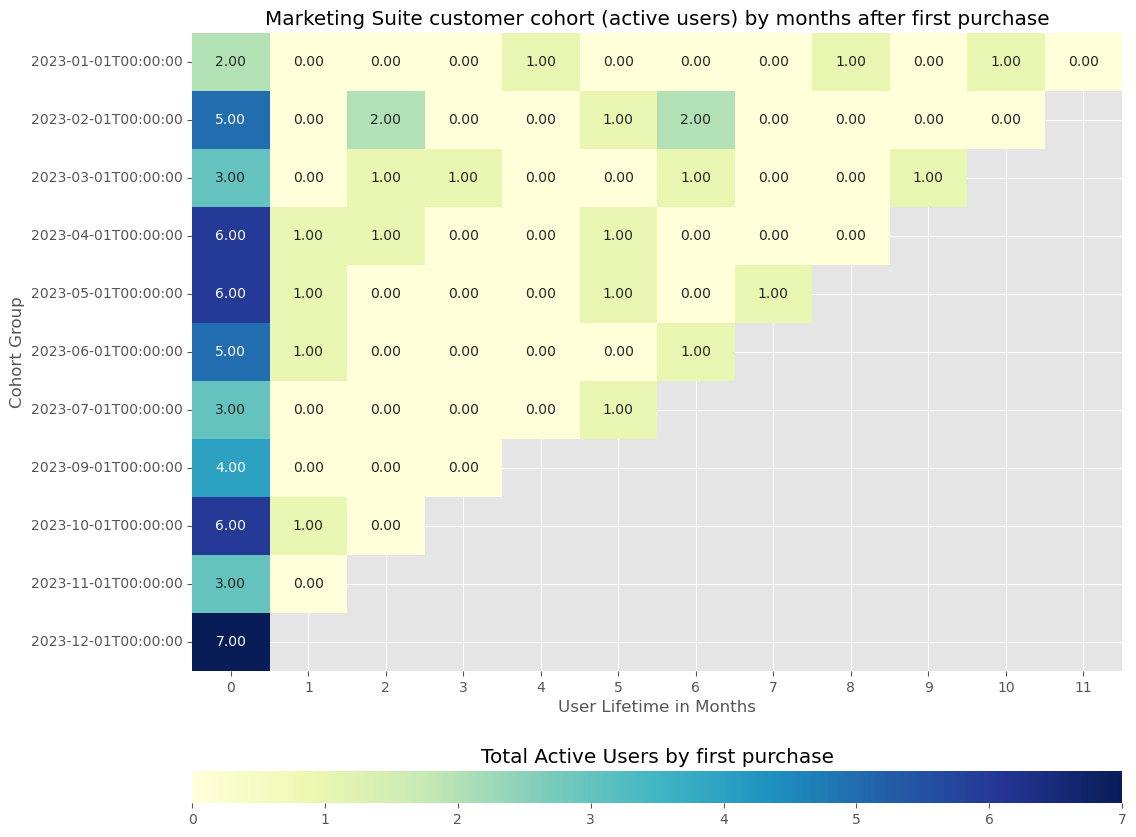

In [ ]:
# customer cohort
pivot0 =prod9_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- Initial active user of monthly cohorts range between 2 to 7, with December being the highest (7).
- Generally for all cohorts, there no activity beyond their initial purchase. On occasion there would be 1 returning user in one or two month's of the cohort's lifetime.

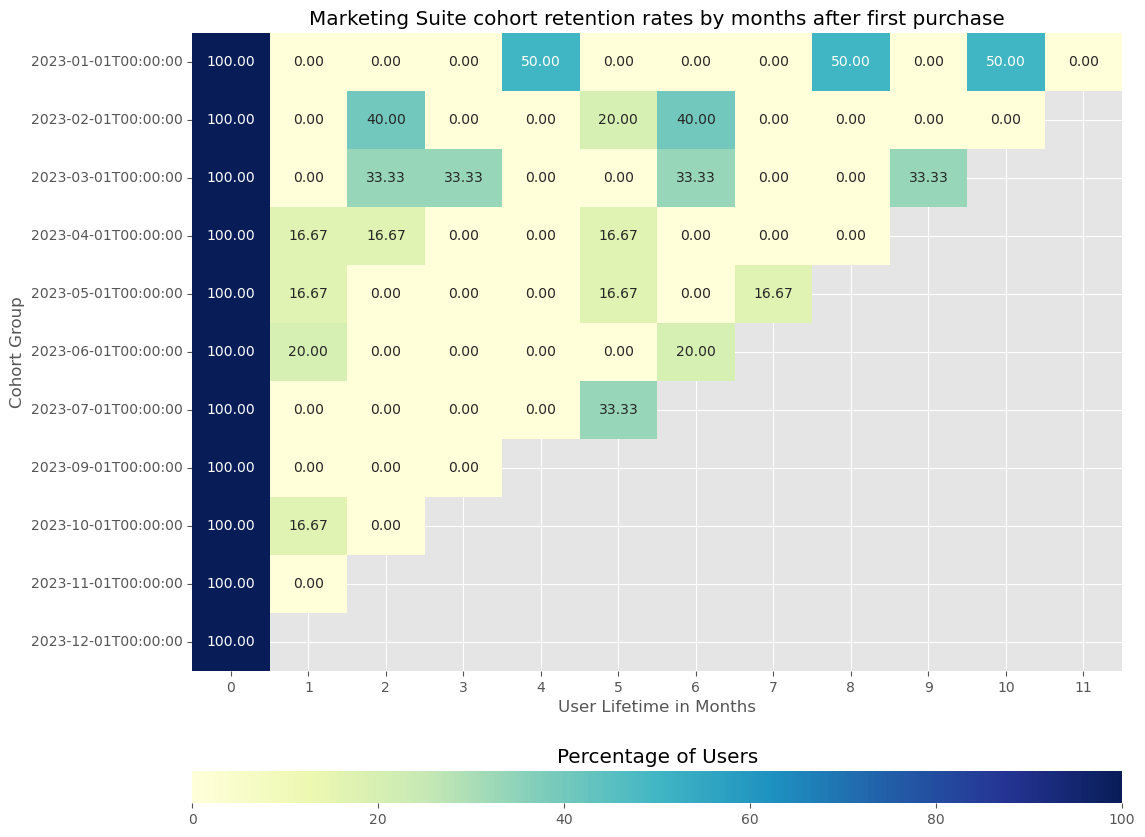

In [19]:
# customer retention
pivot1 =prod9_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- With few users in the initial month, retention rates would drop to 0% at some point for all cohorts. 
- Though there would be return purchases from users, it is not constant and would with be with lower user numbers than the initial month.

C:\Users\arizk\AppData\Local\Temp\ipykernel_9720\2700959402.py:2: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.relplot(data=prod9_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))


Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

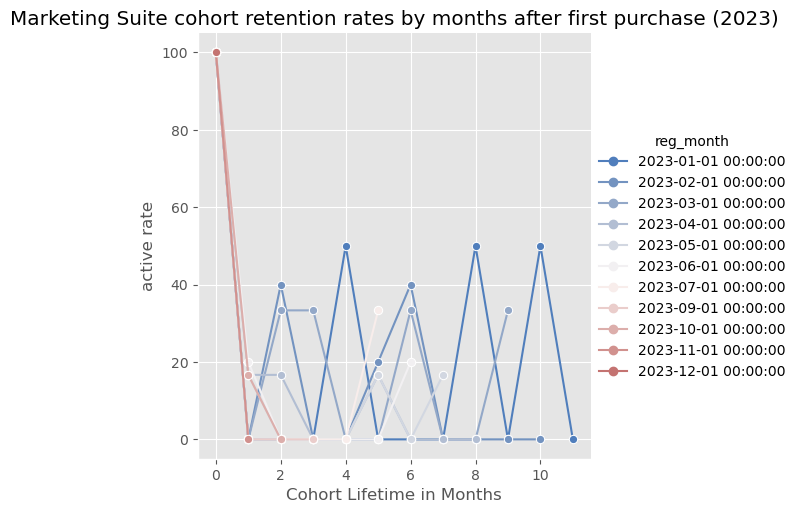

In [20]:
# retention rate lineplots
sns.relplot(data=prod9_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Marketing Suite cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [17]:
prod9_cohort2 =prod9_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

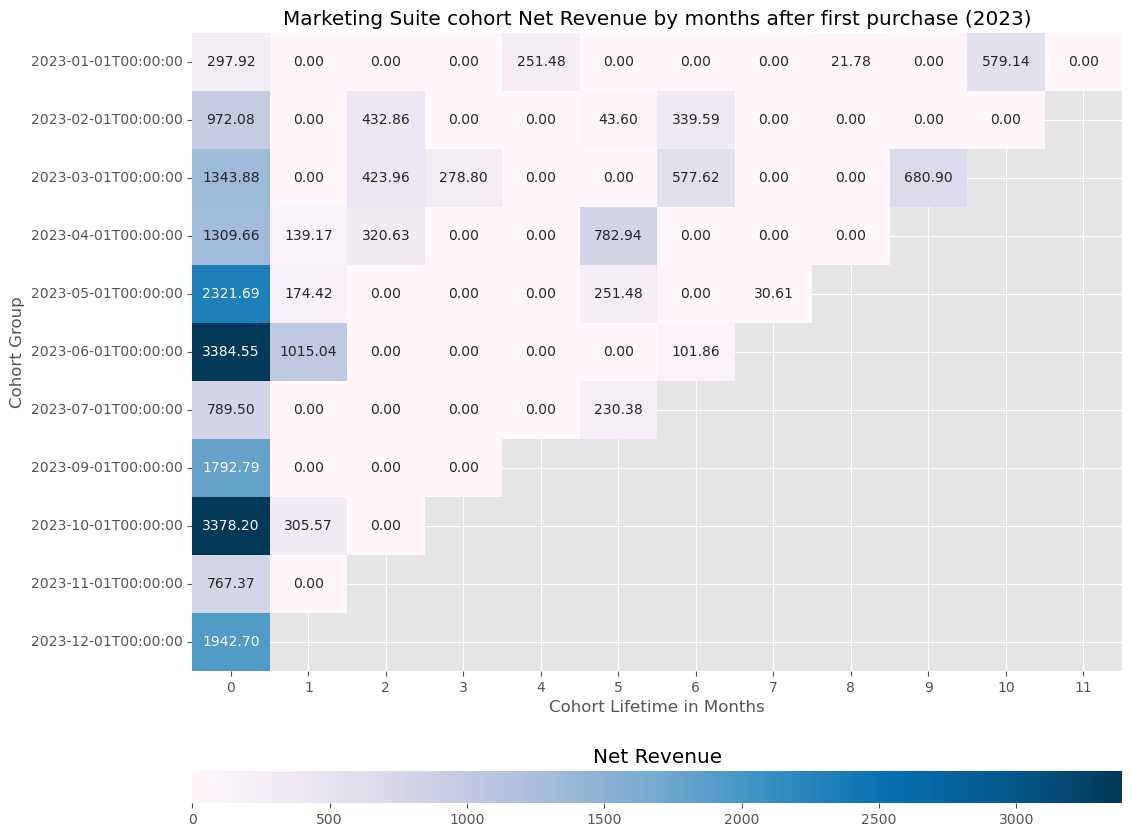

In [22]:
# Net Revenue by Cohort
pivot2 =prod9_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- Most cohort have no subsequent purchases, and if there are (subsequent purchases), it's far-and-between the cohort's lifetime, with lower value than the initial purchase.
- June cohort, who has 5 users in the initial month, has the highest initial purchase, at 3384.55. In the second month, there is a purchase of 1015.04, with no purchases untuil December (101.86).

In [18]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod9_2023_user.loc[prod9_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod9_cohort2 = prod9_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod9_cohort2 ['net dollar retention'] = (prod9_cohort2['discounted_sales'] / prod9_cohort2['ds_max']) * 100

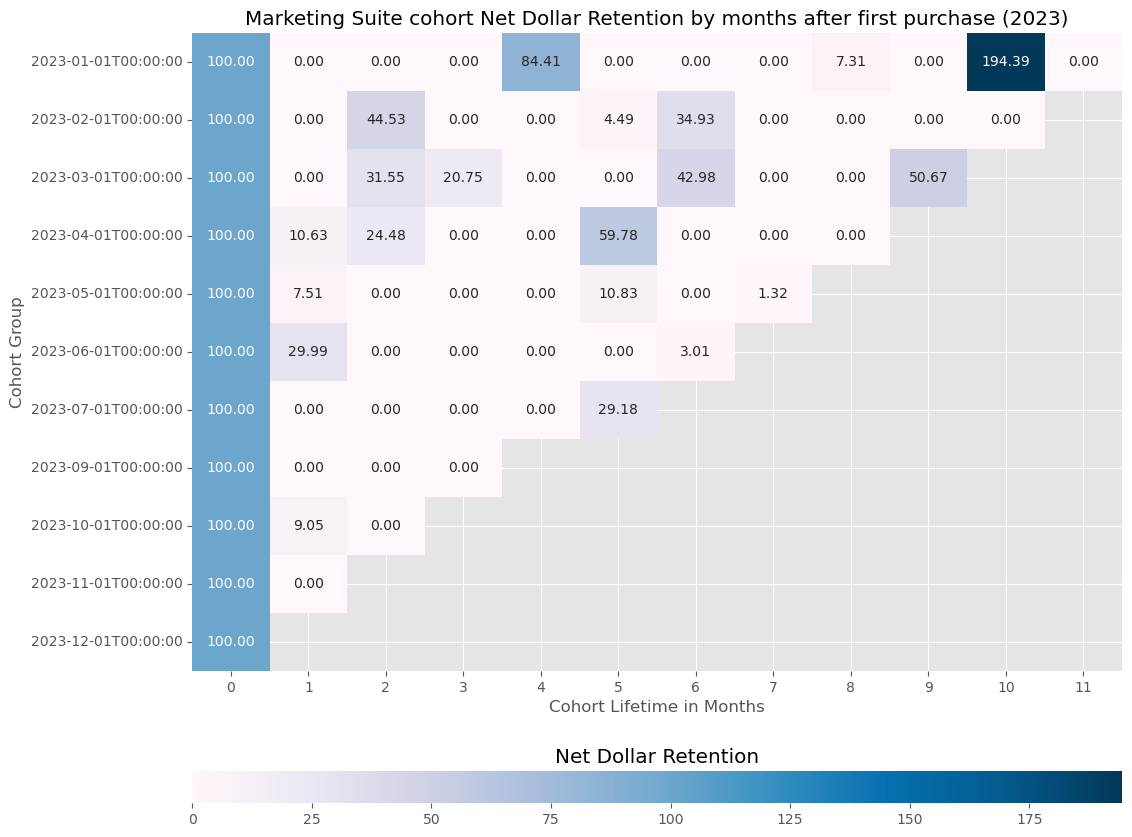

In [24]:
# Net Dollar/Revenue Retention
pivot3 =prod9_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

- For Marketing Suite, as there are few subsequent purchases, generally NDR rates are 0%.
- The January cohort, however, made one subsequent purchase amounting to 194.39% NDR in November. However, rates drop back to 0% in December.

In [19]:
prod9_cohort2 ['cumulative lifetime revenue'] = prod9_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

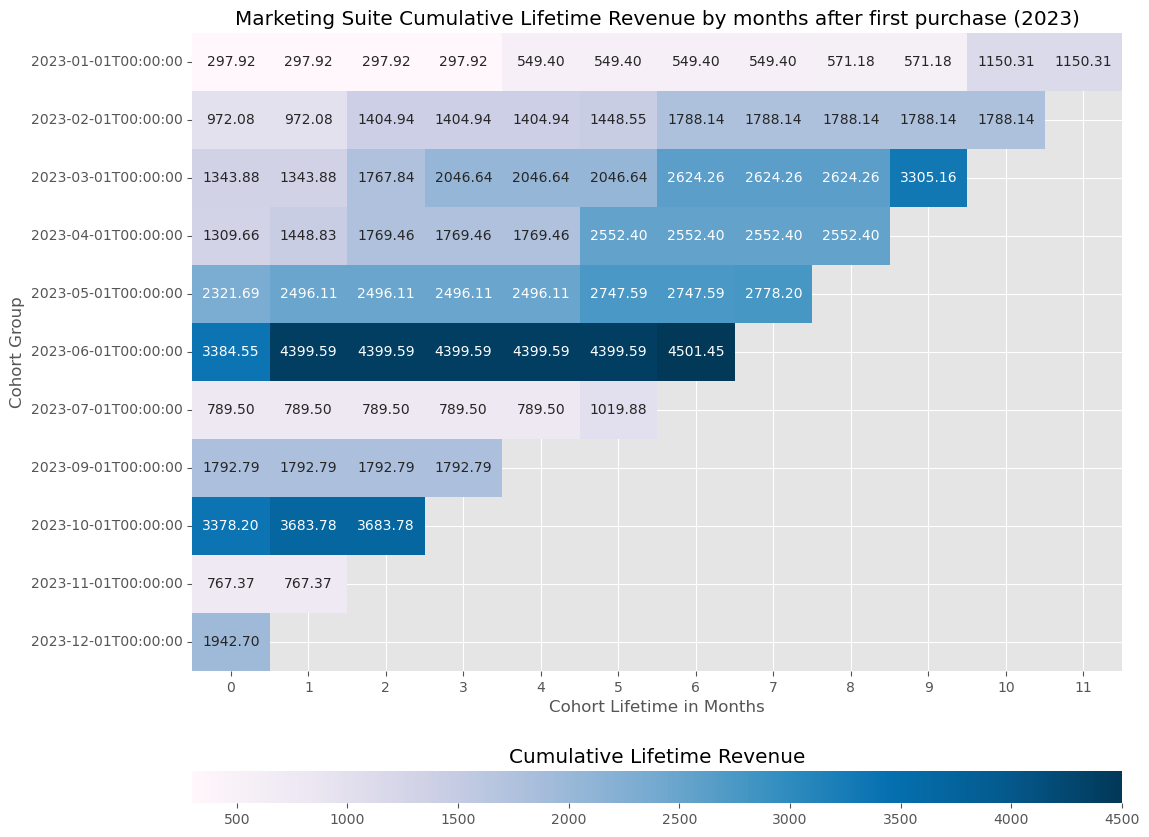

In [26]:
# cumulative lifetime revenue by cohort
pivot4 =prod9_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

C:\Users\arizk\AppData\Local\Temp\ipykernel_10084\927098818.py:2: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.relplot(data=prod9_cohort2 , x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))


Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

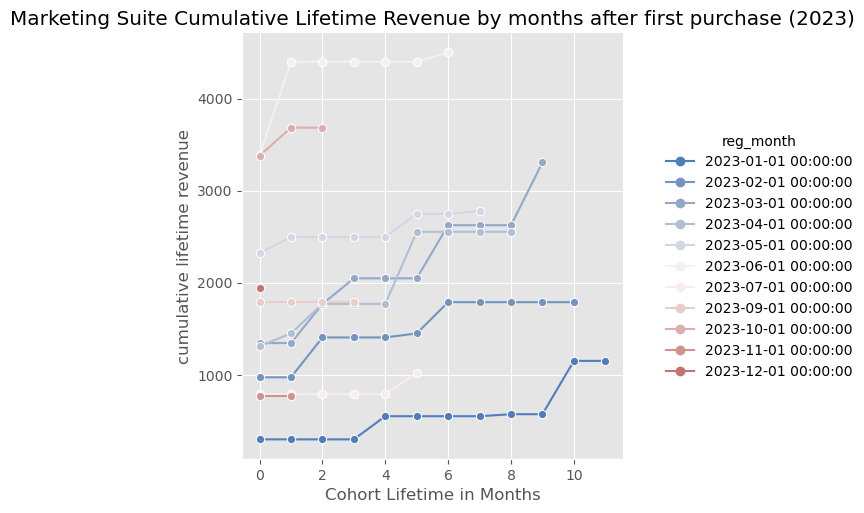

In [ ]:
# some data are easier to read with a different chart- cumulative lifetime revenue lineplots
sns.relplot(data=prod9_cohort2 , x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Marketing Suite Cumulative Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- For most cohorts there is little to no subsequent purchases, and its cumulative revenue remains relatively stagnant, its value being determined largely only the initial purchase.
- March cohort have subsequent purchases in between stagnant months that makes it slightly more upwards trending than other cohorts. However, its purchases are still lower than the initial purchase made by the June and October cohort.

In [20]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod9_2023_user.loc[prod9_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod9_cohort2 = prod9_cohort2.merge(user_max,how='left',on=['reg_month'])
prod9_cohort2 ['customer lifetime revenue'] = (prod9_cohort2['cumulative lifetime revenue'] / prod9_cohort2['user_max'])

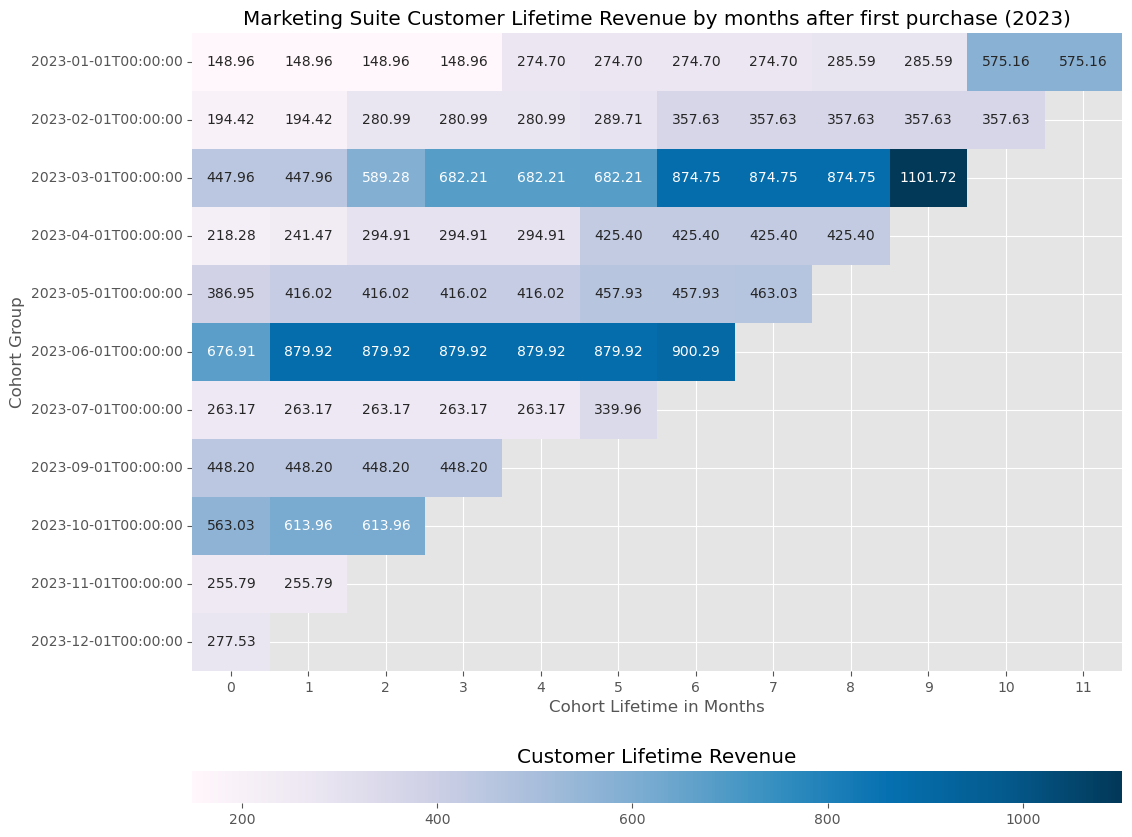

In [28]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod9_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

C:\Users\arizk\AppData\Local\Temp\ipykernel_10084\2834760757.py:2: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.relplot(data=prod9_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))


Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

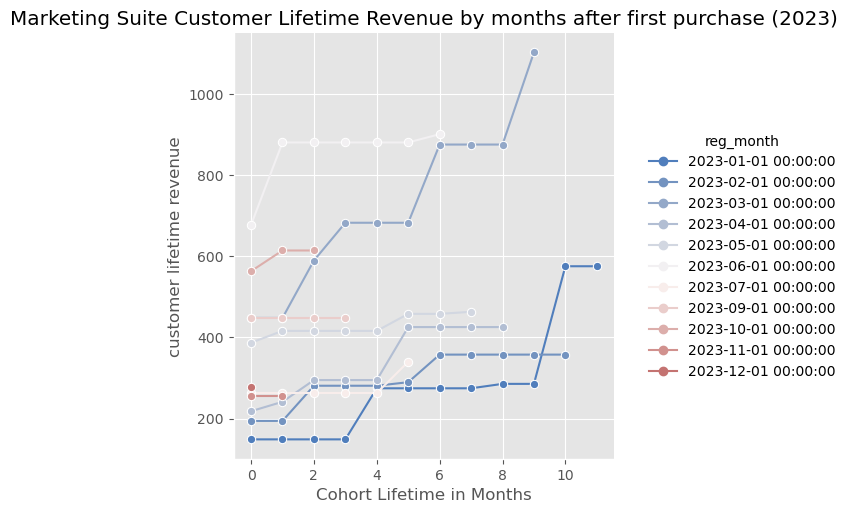

In [32]:
#  customer lifetime revenue lineplots
sns.relplot(data=prod9_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Marketing Suite Customer Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- On a per customer basis, the highest can be observed in the March Cohort. Though its initial per-user value isn't the highest (447.96), by December each user in the cohort on average would pay 1101.72.

In [21]:
# CLV - but with net profit
prod9_cohort2 ['cum_net_profit'] = prod9_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod9_cohort2 ['Customer Lifetime Value'] = (prod9_cohort2['cum_net_profit'] / prod9_cohort2['user_max'])

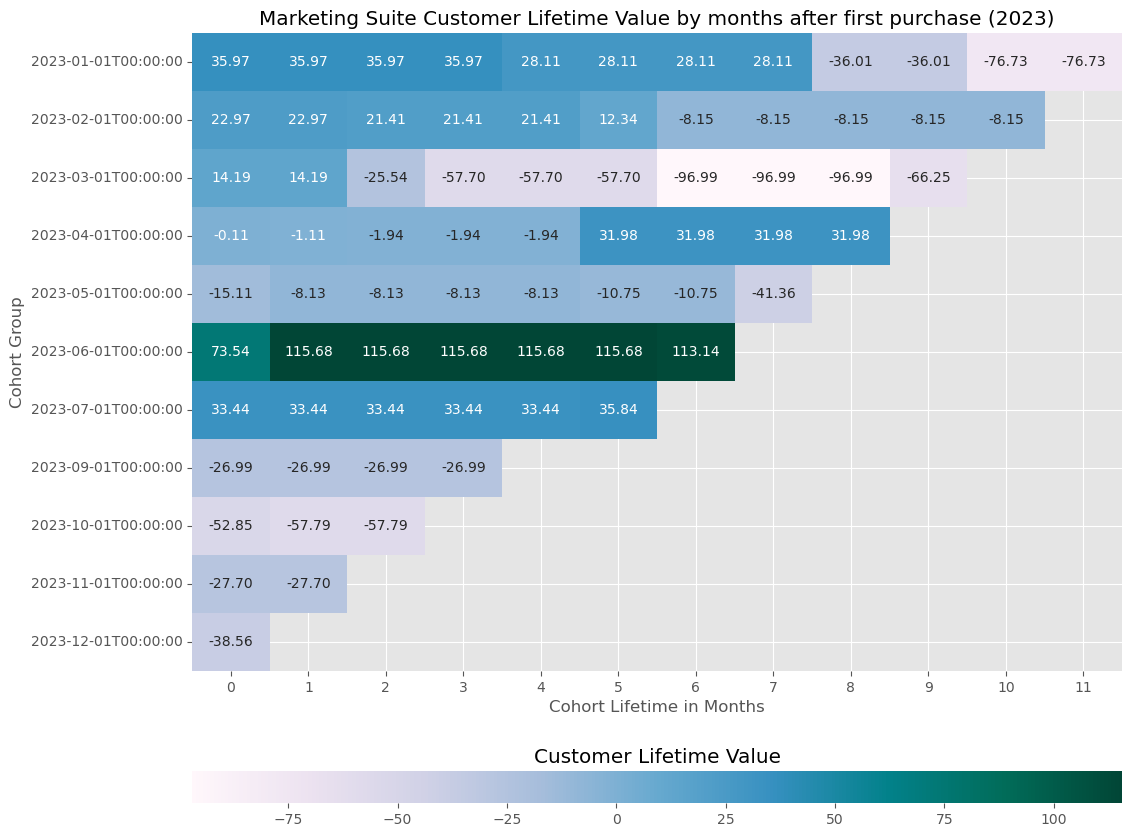

In [ ]:
# Customer Lifetime Value, by cohort
pivot6 =prod9_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

C:\Users\arizk\AppData\Local\Temp\ipykernel_7416\3283209743.py:2: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.relplot(data=prod9_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))


Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

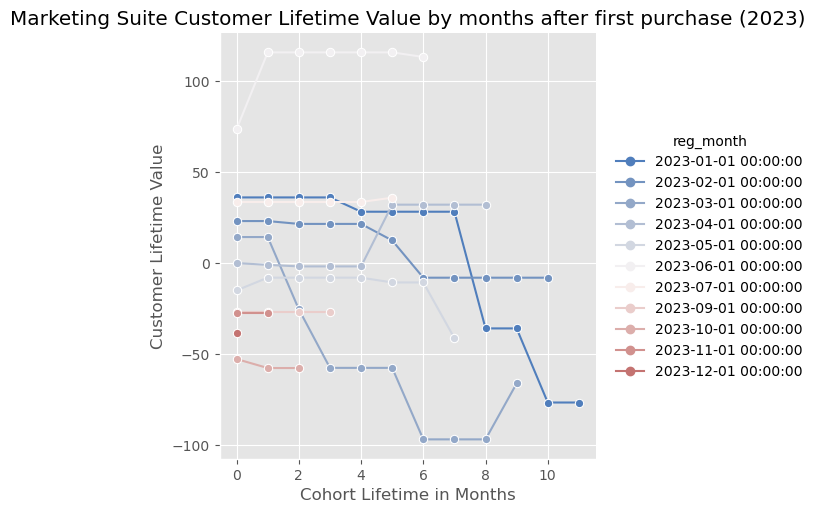

In [23]:
#  customer lifetime value lineplots
sns.relplot(data=prod9_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Marketing Suite Customer Lifetime Value by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [24]:
# losses from March cohort
(25.54 + (57.70 *3) + (96.99*3) + 66.25) / 8

69.4825

In [ ]:
# March cohort losses assuming all user active
(69.5 * 3) * 10

2085.0

-  It can be observed that there are many negative profit values per user in the cohorts, meaning that Marketing Suite is probably contributing to losses. In fact, most cohort are downwards-trending.
-  January (2 users), February (5 users), March (3 users), May (6 users), September (4 users), Oktober (4 users), November (3), and December (7 users)  all contribute to losses on a per user basis. March cohort in particular, have 8 months in its lifetime contributing to loss, with each month on average losing about 69.5 in profit. Assuming all user in the cohort is active each month, this could possibly mean around 2k lost.
- June cohort (5 users) provide the highest profits from all the cohorts per user (115.68 made by the first month after the initial purchase, with little to no purchases made onwards). Based on the CLV, this cohort show the most promise. However, since this CLV value is made using net profit instead of gross profit, here Costumer Acquisition Cost (CAC) is assumed to be already accounted for. Usually, CLV values (calculated with gross profit) is measured against CAC to see the actual value of a customer. Since CAC data doesn't exist in this dataset and is taked as granted, CLV of June cohort should not be taken at face value. Just for estimation purposes.

**Key findings:**
1. Initial active user range between 2 to 7, with no activity beyond the initial purchase. On occasion there would be a returning user in 1 or 2 months of the cohort's lifetime. Retention rates would drop to 0% at some point for all cohorts.
2. January cohort made one subsequent purchase amounting to 194.39% NDR in November. However, rates drop back to 0% in December.
3. There are many negative profit values. On a per user basis, cohorts in January, February, March, May, September, Oktober, November, and December all contribute to losses on a per user basis. March cohort in particular, have 8 months in its lifetime contributing to loss, with each month on average losing about 69.5 in profit. Assuming all user in the cohort is active each month, this could possibly mean around 2k lost.
4. Profits are rare and marginal, June cohort being an example. It has the highest profits (115.68 made by the first month after the initial purchase, with little to no purchases made onwards).

### Profitability

In [21]:
# calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives= prod9_2023[prod9_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives= prod9_2023[prod9_2023['(net)_profit_before_discount'] > 0]
# negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

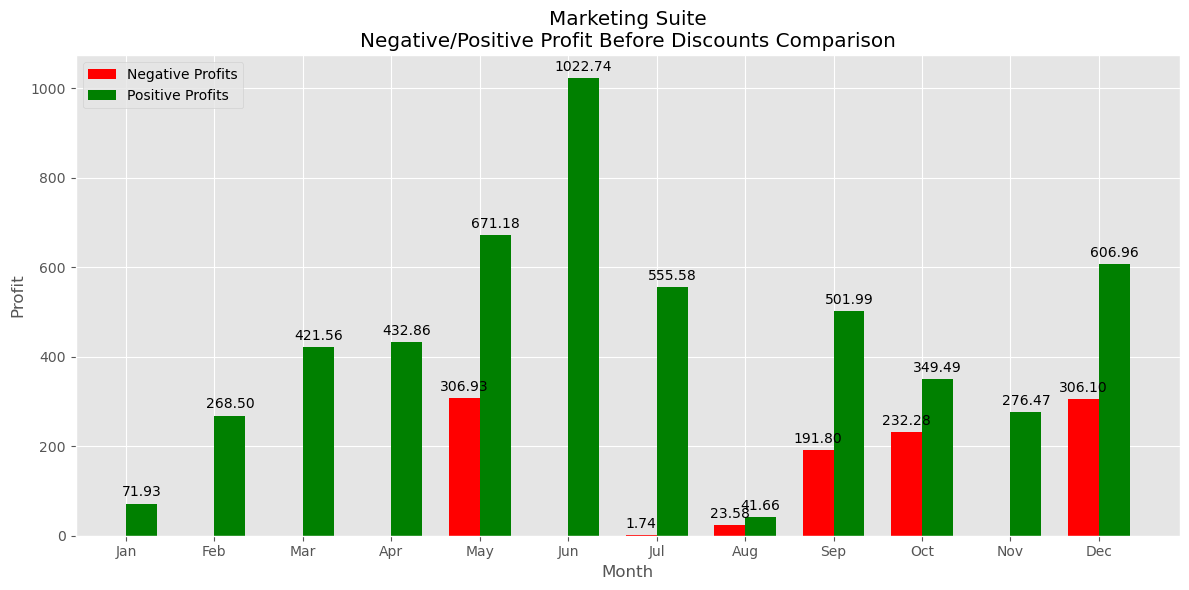

In [23]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Marketing Suite\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

**Key Findings:** 
1. Marketing Suite's monthly overall profits show notable fluctuations, both positive and negative, even before considering discounts. Fluctuations in the profits of Marketing Suite could be influenced by the performance of a related product like Marketing Suite-Gold. If both products target a similar customer base, strong sales of Marketing Suite-Gold might eat into the potential sales of Marketing Suite, and vice versa (to be analyzed in a different section).
2. Positive profits consistently rise from January (71.9306) to peak in June (1022.7364). After June, they gradually decrease until October (349.4924), with a notable uptick in December (606.9615), possibly due to seasonal demand or aggressive discounting.
3. Negative profits start increasing from July (1.7442), peaking in December (306.1014). Significant increments are seen in August (23.5764), September (191.7996), and October (232.2816), potentially driven by higher marketing costs or reduced customer engagement during these months.
4. Decline in positive profits from July to October aligns with the rise in negative profits, suggesting that factors negatively affecting overall profitability become more pronounced during these months.

### Discounting EDA

In [24]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod9_2023[(prod9_2023['net_profit'] < 0)]
post_discount_positives = prod9_2023[(prod9_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

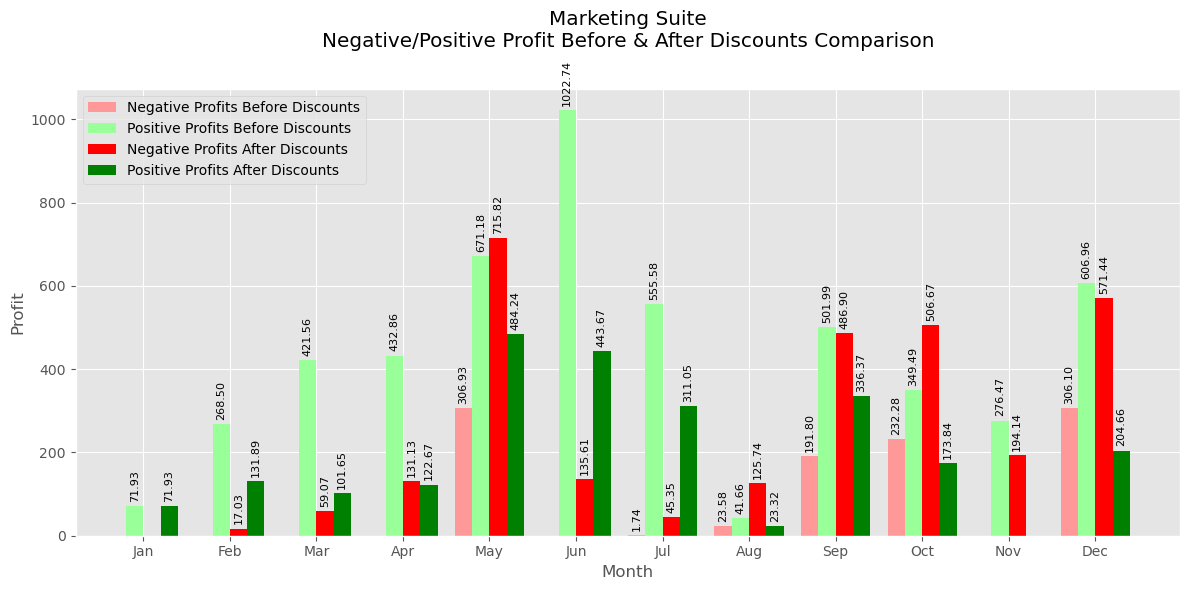

In [26]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Marketing Suite\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

- After accounting for discounts, overall profits decrease in most months, turning negative in April (from 432.8590 to -8.4562), May (from 364.2538 to -231.5776), August (from 18.0792 to -102.4224), September (from 310.1925 to -150.5328), October (from 117.2108 to -332.8318), November (from 276.4661 to -194.1442), and December (from 300.8601 to -366.7888). This shows that the discount strategy often leads to significant losses and turns positive profits into negative outcomes, emphasizing the need for a balanced approach to discounting.
- Though some months remain positive, there is a significant reduction in overall profits after discounts, such as February (from 268.5001 to 114.8606), March (from 421.5562 to 42.5764), June (from 1022.7364 to 308.0575), and July (from 553.8322 to 265.7026).
- Negative overall profits tend to occur from mid to the end of the year, starting from April, highlighting the need to address these months' profitability challenges.

In [29]:
discount_month = prod9_2023.query("Discount > 0").groupby(['Customer ID','Month'])[['Discount']].agg('count').reset_index()
prod9_2023_user = prod9_2023_user.merge(discount_month,how='left',on=['Customer ID','Month'])
account_count = prod9_2023.groupby(['Customer ID','Month'])[['Order ID']].count().reset_index()
account_count.columns = ['Customer ID','Month', 'account_cnt']
prod9_2023_user = prod9_2023_user.merge(account_count,how='left',on=['Customer ID','Month'])

In [30]:
discount_report = prod9_2023_user.groupby('Month')[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active', 'Discount', 'account_cnt']].agg('sum')
discount_report

,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active,Discount,account_cnt
Month,,,,,,,,,,
2023-01-01,4.0000,297.9200,297.9200,71.9306,71.9306,2,2,2,0.0000,2.0000
2023-02-01,12.0000,1125.7234,972.0839,268.5001,114.8606,7,5,5,4.0000,5.0000
2023-03-01,9.0000,1722.8600,1343.8802,421.5562,42.5764,10,3,3,2.0000,3.0000
2023-04-01,37.0000,2183.8364,1742.5212,432.8590,-8.4562,16,6,8,8.0000,8.0000
2023-05-01,39.0000,3732.1332,3136.3018,364.2538,-231.5776,22,6,9,6.0000,9.0000
2023-06-01,36.0000,4873.0737,4158.3948,1022.7364,308.0575,27,5,8,7.0000,9.0000
2023-07-01,16.0000,2136.2740,1848.1444,553.8322,265.7026,30,3,5,3.0000,5.0000
2023-08-01,7.0000,460.0920,339.5904,18.0792,-102.4224,30,0,2,2.0000,3.0000
2023-09-01,23.0000,3635.8560,3175.1307,310.1925,-150.5328,34,4,7,4.0000,7.0000


In [31]:
prod9_2023_user[['account_cnt']].sum()

account_cnt   76.0000
dtype: float64

In [32]:
prod9_2023_user[['Discount']].sum()

Discount   56.0000
dtype: float64

In [33]:
(56 / 76) * 100

73.68421052631578

- There is 76 invoices for Marketing Suite in 2023, 56 of which were applied discounts (~74%). With more discounted orders, this suggests discounts are a significant aspect of the sales strategy for Marketing Suite. It relies on discounts to drive sales, which could be impacting overall profitability.

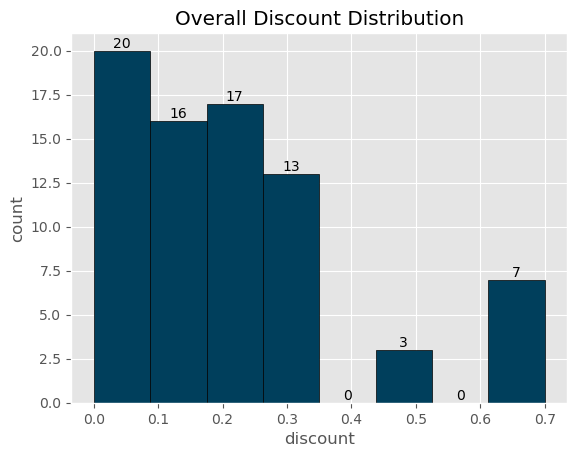

In [36]:
n, bins, patches = plt.hist(data=prod9_2023, x='Discount', bins=8, color='#003f5c', edgecolor='black')
plt.title('Overall Discount Distribution')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()

In [37]:
20 + 16 + 17 + 13 + 3 + 7

76

In [38]:
16+17+13

46

In [39]:
46/56

0.8214285714285714

- Out of 56 orders that were discounted 16 are 10% discounts, 17 are 20% discount, 13 are 30% discounts, 3 are 50% discounts, and 7 are 70% discounts.
- We can see about 82% of orders are orders in the 10-30% discount range, which imply that this is the optimal discount range that attracts the majority of customers. This indicates that customers are still willing to purchase Marketing Suite without the need for excessive discounting.
- A small number of orders (10 out of 76) with very high discounts (50% and 70%) could significantly impact overall profitability, especially if these orders are on high-value items.

In [40]:
# Range of Discounts (May, June, July, September, December)
filtered_df = prod9_2023[prod9_2023['month'].isin([5, 6, 7, 9, 12])]

# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std      mean       min    median       75%       max  \
month Discount                                                              
5     0.0000   185.8329  161.4127   33.8744   75.7350  225.1818  374.6286   
      0.2000        NaN  -15.7176  -15.7176  -15.7176  -15.7176  -15.7176   
      0.3200    80.0248  -62.6057 -119.1918  -62.6057  -34.3126   -6.0196   
      0.5000        NaN  -64.9376  -64.9376  -64.9376  -64.9376  -64.9376   
      0.7000   144.2354 -254.9745 -356.9643 -254.9745 -203.9796 -152.9847   
6     0.0000   101.3970  113.5593   41.8608  113.5593  149.4085  185.2578   
      0.1500    86.3947   62.1018  -30.2450   75.5937  108.2752  140.9568   
      0.2000     2.6288   -2.9654   -5.0098   -3.8864   -1.9432    0.0000   
      0.3200        NaN  -96.4704  -96.4704  -96.4704  -96.4704  -96.4704   
7     0.0000    31.2294   47.5937   25.5112   47.5937   58.6349   69.6762   
      0.1500   145.3851  107.9322    5.1294  107.9322  159.3336  210.7350   
      0.5000        NaN  -45.3492  -45.3492  -45.3492  -45.3492  -45.3492   
9     0.0000    85.2301  107.4247   41.1332   77.5764  140.5704  203.5644   
      0.1500        NaN   14.0980   14.0980   14.0980   14.0980   14.0980   
      0.3000        NaN -117.8820 -117.8820 -117.8820 -117.8820 -117.8820   
      0.7000    79.5815 -184.5114 -240.7840 -184.5114 -156.3751 -128.2388   
12    0.0000     5.5118   44.4622   41.1684   41.3928   46.1091   50.8254   
      0.1500    22.3706   11.4881  -12.6882   15.6978   23.5763   31.4548   
      0.2000     3.7305    8.0389    4.7996    7.1994    9.6585   12.1176   
      0.3200        NaN  -11.5960  -11.5960  -11.5960  -11.5960  -11.5960   
      0.7000   127.2054 -273.5802 -363.5280 -273.5802 -228.6063 -183.6324   

                count  
month Discount         
5     0.0000        3  
      0.2000        1  
      0.3200        2  
      0.5000        1  
      0.7000        2  
6     0.0000        2  
      0.1500        3  
      0.2000        3  
      0.3200        1  
7     0.0000        2  
      0.1500        2  
      0.5000        1  
9     0.0000        3  
      0.1500        1  
      0.3000        1  
      0.7000        2  
12    0.0000        3  
      0.1500        3  
      0.2000        3  
      0.3200        1  
      0.7000        2

> Variability (std): Varying standard deviations across months reflect different business contexts and conditions. Each month presents unique challenges and opportunities that affect profit consistency. For instance, the lower standard deviations in other months suggest more stable and predictable profit patterns.

Data above is the distribution of profit across different discount ranges, for 5 representative months. Reasons choosing particular months are as follows: 
- May: This month has high negative profit after discounts, useful for understanding the challenges faced during this period.
- June: Highest positive profit before discounts (1022.7364), indicating peak sales performance.
- July: Mid-year performance with moderate discounts, offering a balanced view of profit and discount interplay.
- September: Shows significant negative profits after discounts, providing insight into the impact of discounts on profitability.
- December: Significant changes in profit after discounts, with both high positive and negative profit variations, and high overall sales activity.

- Presence of various discount levels (specifically 15% and 32%; grouped in the 10% and 30% discount ranges in the previous discount distribution data) suggests that discount optimization efforts have been diverse.
- For May, all discount ranges above 0% (20%, 32%, 50%, 70%) consistently result in negative profits, as indicated by the mean, min, median, 75%, and max values. Consistent negative profits in May for all discount ranges indicate that current discounts are cutting too deep into margins, hurting profitability. In this case, the issue might not just be sales volume but also pricing.
- For June, the 15% discount is profitable, with mean (62.1018), median (75.5937), 75% (108.2752), and max (140.9568) values all positive. The 20% discount, however, leads to slight losses, with negative mean (-2.9654), 75% (-1.9432), and max (0.0000) values. This shows that 15% is the sweet spot, while 20% goes too far. Adjusting discounts to stay closer to 15% could keep profits up.
- For July, the 15% discount range has high variability in profits (mean 107.9322) due to one very high (max 210.7350) and one very low (min 5.1294) order. No discount orders are more consistent. The single 50% discount order is negative (-45.3492). This shows that 15% discounts are unpredictable but can be profitable, while higher discounts lead to losses.
- For September, the single order with a 30% discount shows negative values (mean -117.8820), indicating it's too steep. In contrast, the single order with a 15% discount is positive (mean 14.0980), though low. This suggests that 15% is the upper boundary for maintaining profitability in September.
- For December, the 15% discount range is the most profitable (mean 11.4881, median 15.6978, 75% 23.5763, max 31.4548) compared to no discount (mean 44.4622, median 41.1684) and the 20% discount (mean 8.0389, median 7.1994). Discounts of 32% and higher result in losses (32%: mean -11.5960, 70%: mean -273.5802). A discount cap of 20% is optimal, with 15% being the sweet spot.
- Overall trend suggests that a 15% discount is generally the optimal level across multiple months, balancing profitability and sales incentives. Discounts above 20% consistently lead to negative profits, indicating they are too steep. Setting a discount cap at 20%, with a preference for 15%, would likely maintain profitability while still offering value to customers.
- High discounts (50% and 70%) consistently show significant negative values across selected months. For May, the 50% discount has a mean of -64.9376 and the 70% discount a mean of -254.9745. In July, the 50% discount has a mean of -45.3492. In September, the 70% discount has a mean of -184.5114. December's 70% discount has a mean of -273.5802. This is a hypothesis, but it might hold some truth: these negative values suggest high discounts are used to introduce big clients to Marketing Suite-Gold, despite initial losses.

**Key findings:**
1. There is 76 invoices for Marketing Suite in 2023, 56 of which were applied discounts (~74%). With more discounted orders, this suggests discounts are a significant aspect of the sales strategy for Marketing Suite. It relies on discounts to drive sales, which could be impacting overall profitability.
2. After discounts, overall profits turn negative in multiple months: April (from 432.8590 to -8.4562), May (from 364.2538 to -231.5776), August (from 18.0792 to -102.4224), September (from 310.1925 to -150.5328), October (from 117.2108 to -332.8318), November (from 276.4661 to -194.1442), and December (from 300.8601 to -366.7888).
3. About 82% of orders fall within the 10-30% discount range, indicating this range is effective at attracting customers without excessive discounting.
4. A 15% discount is generally the most profitable, while higher discounts consistently lead to losses.
5. High discounts (50% and 70%) on a small number of orders significantly impact overall profitability, especially for high-value items. However, high discounts might be used to introduce big clients to the more profitable Marketing Suite-Gold, despite initial losses.

### Segmentation EDA

In [7]:
# make a segment df, from the product df
prod9_2023_segment = prod9_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod9_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod9_2023_percents = segment_account.merge(prod9_2023_segment,how='left',on=['Segment'])
prod9_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,8,20,3167.2134,2706.6743,632.0311,171.4920
1,SMB,48,160,18305.6289,15530.9340,2454.2081,-320.4868
2,Strategic,20,96,8551.4374,7044.5682,1072.2379,-434.6313


In [8]:
# calculate percentage of segment's business share by category
prod9_2023_percents['% Account']= prod9_2023_percents['account'] / prod9_2023_percents['account'].sum() *100
prod9_2023_percents['% Quantity']= prod9_2023_percents['Quantity'] / prod9_2023_percents['Quantity'].sum() *100
prod9_2023_percents['% Sales']= prod9_2023_percents['Sales'] / prod9_2023_percents['Sales'].sum() *100
prod9_2023_percents['% Net Revenue']= prod9_2023_percents['discounted_sales'] / prod9_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod9_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod9_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

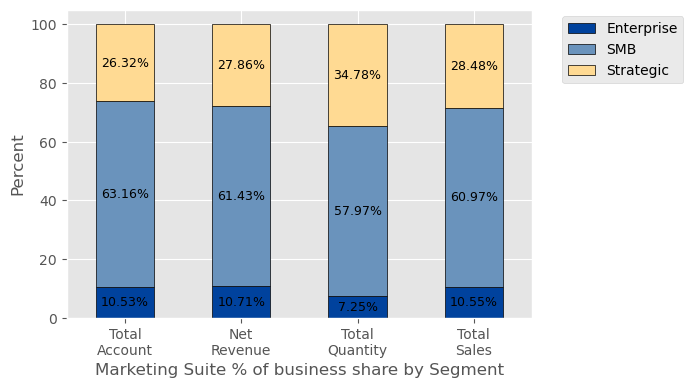

In [35]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod9_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Marketing Suite % of business share by Segment')
plt.ylabel('Percent')

- In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "Marketing Suite" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for Marketing Suite based on the last year of company activity.
- SMB segment has the highest share across all categories: Total Accounts, Net Revenue, Total Quantity, and Total Sales, making it the dominant segment.

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

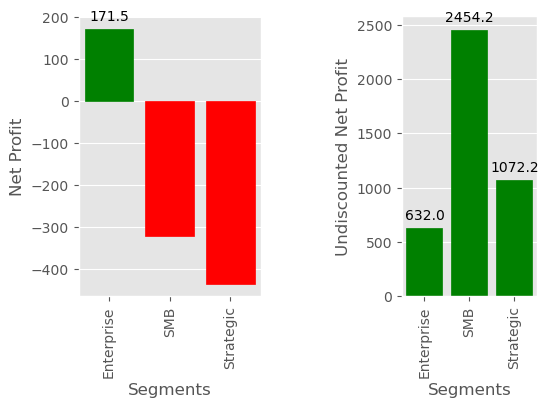

In [36]:
# Marketing Suite net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod9_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod9_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Enterprise segment shows a positive net profit (171.5) and a substantial undiscounted net profit (632.0).
- SMB segment has a negative net profit (~ -300) but a significantly high undiscounted net profit (2454.2).
- Strategic segment also has a negative net profit (~ -350) yet a positive undiscounted net profit (1072.2).

If we account for discounting, Enterprise segment emerges as the high-performing segment for the Marketing Suite, as it delivers significantly higher financial value relative to its proportion of customer accounts, with a positive net profit.
- Holds only 10.53% of Total Accounts but contributes positively with a Net Profit of 171.5 and an Undiscounted Net Profit of 632.0.
- This segment maintains a consistent share in Net Revenue (10.71%) and Total Sales (10.55%).
- Enterprise is the only segment with a positive net profit, indicating strong financial health and efficient cost management.

SMB and Strategic segments, while dominant in account share and revenue, exhibit negative net profits, indicating potential areas for improvement in cost management and revenue generation.
- SMB dominates with the highest share of Total Accounts (63.16%), Net Revenue (61.43%), and Total Sales (60.97%). Despite the dominant presence, SMB shows a negative net profit (-300), indicating potential issues with costs or revenue generation. However, the segment has a substantial Undiscounted Net Profit of 2454.2, suggesting that discounts or cost management might be areas of improvement.
- Strategic holds 26.32% of Total Accounts and contributes 27.86% of Net Revenue and 28.48% of Total Sales. This segment also shows a negative net profit (-350), indicating challenges in profitability. Segment's Undiscounted Net Profit of 1072.2 suggests that there might be significant discounts or cost issues affecting net profitability.

### Further Inquiries on Segments -----------

In [9]:
# Copy-pasted code for Industry queries within segment
# Industries using Marketing Suite within the SMB Segment
prod9_2023_industry_SMB = prod9_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod9_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod9_2023_percents_SMB = SMB_account.merge(prod9_2023_industry_SMB,how='left',on=['Industry'])
prod9_2023_percents_SMB['% Account']= prod9_2023_percents_SMB['account'] / prod9_2023_percents_SMB['account'].sum() *100
prod9_2023_percents_SMB['% Quantity']= prod9_2023_percents_SMB['Quantity'] / prod9_2023_percents_SMB['Quantity'].sum() *100
prod9_2023_percents_SMB['% Sales']= prod9_2023_percents_SMB['Sales'] / prod9_2023_percents_SMB['Sales'].sum() *100
prod9_2023_percents_SMB['% Net Revenue']= prod9_2023_percents_SMB['discounted_sales'] / prod9_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod9_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod9_SMB = percents_SMB.columns.tolist()
# Industries using Marketing Suite within the Strategic Segment
prod9_2023_industry_Strategic = prod9_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod9_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod9_2023_percents_Strategic = Strategic_account.merge(prod9_2023_industry_Strategic,how='left',on=['Industry'])
prod9_2023_percents_Strategic['% Account']= prod9_2023_percents_Strategic['account'] / prod9_2023_percents_Strategic['account'].sum() *100
prod9_2023_percents_Strategic['% Quantity']= prod9_2023_percents_Strategic['Quantity'] / prod9_2023_percents_Strategic['Quantity'].sum() *100
prod9_2023_percents_Strategic['% Sales']= prod9_2023_percents_Strategic['Sales'] / prod9_2023_percents_Strategic['Sales'].sum() *100
prod9_2023_percents_Strategic['% Net Revenue']= prod9_2023_percents_Strategic['discounted_sales'] / prod9_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod9_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod9_Strategic = percents_Strategic.columns.tolist()
# Industries using Marketing Suite within the Enterprise Segment
prod9_2023_industry_Enterprise = prod9_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod9_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod9_2023_percents_Enterprise = Enterprise_account.merge(prod9_2023_industry_Enterprise,how='left',on=['Industry'])
prod9_2023_percents_Enterprise['% Account']= prod9_2023_percents_Enterprise['account'] / prod9_2023_percents_Enterprise['account'].sum() *100
prod9_2023_percents_Enterprise['% Quantity']= prod9_2023_percents_Enterprise['Quantity'] / prod9_2023_percents_Enterprise['Quantity'].sum() *100
prod9_2023_percents_Enterprise['% Sales']= prod9_2023_percents_Enterprise['Sales'] / prod9_2023_percents_Enterprise['Sales'].sum() *100
prod9_2023_percents_Enterprise['% Net Revenue']= prod9_2023_percents_Enterprise['discounted_sales'] / prod9_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod9_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod9_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

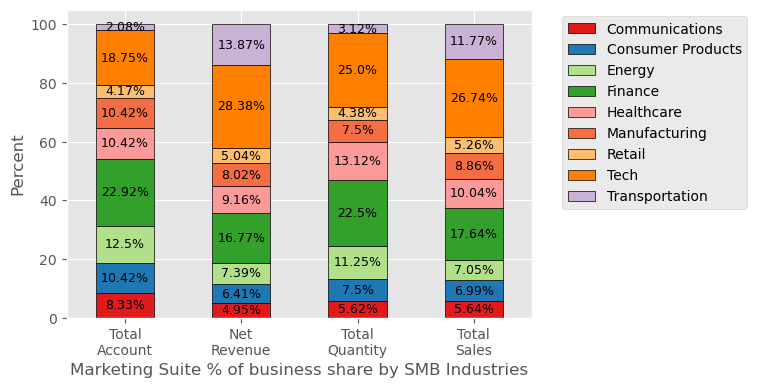

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod9_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Marketing Suite % of business share by SMB Industries')
plt.ylabel('Percent')

- Finance industry dominates in Total Accounts (22.92%) and shows strong shares in Net Revenue (16.77%) and Total Sales (17.64%).
- Tech industry has the highest shares in Net Revenue (28.38%) and Total Sales (26.74%), with a significant share in Total Accounts (18.75%).
- Retail industry shows moderate shares across the categories.
- Energy industry has a moderate share in Total Accounts (12.50%) and contributes to Net Revenue (7.39%) and Total Sales (7.05%).
- Communications, Consumer Products, and Healthcare also have moderate shares across the categories.
- Manufacturing shows lower percentages but maintains a presence.
- Transportation has the lowest share across most categories but contributes to the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

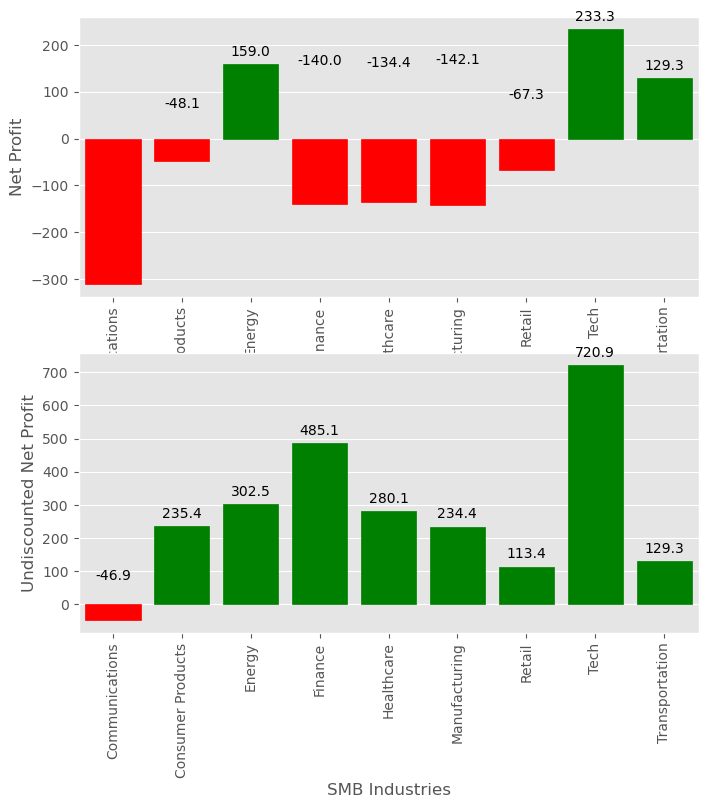

In [39]:
# Marketing Suite net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod9_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod9_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Tech industry shows strong performance with the highest Net Profit Before Discount (720.8986) and a positive Net Profit (233.2724).
- Energy industry has a significant Net Profit Before Discount (302.5409) and positive Net Profit (159.0320).
- Transportation industry also exhibits positive Net Profit (129.2940) and Net Profit Before Discount (129.2940).
- Finance, Healthcare, Manufacturing, and Retail industries, despite having higher Net Profit Before Discount, show negative Net Profits.
- Communications and Consumer Products industries exhibit weaker performance with negative Net Profits.

Tech industry, with 18.75% of Total Accounts, leads in Net Revenue (28.38%) and Total Sales (26.74%), achieving a Net Profit Before Discount of 720.8986 and a Net Profit of 233.2724, making it the top performer in the SMB segment of the Marketing Suite. Energy, holding 12.5% of Total Accounts, contributes significantly with a Net Profit Before Discount of 302.5409 and a Net Profit of 159.0320, indicating solid financial health. Transportation, with the lowest share in Total Accounts (2.08%), still manages a positive Net Profit Before Discount and Net Profit of 129.2940.

On the other hand, the Finance industry, despite having the highest Total Accounts share (22.92%) and significant shares in Net Revenue (16.77%) and Total Sales (17.64%), shows a negative Net Profit of -140.0234. Healthcare (Net Profit: -134.3632), Manufacturing (Net Profit: -142.0546), and Retail (Net Profit: -67.3430) also face challenges with cost management, despite their moderate presence in the business share categories. The Communications (Net Profit: -310.1638) and Consumer Products (Net Profit: -48.1372) industries need significant improvements to enhance profitability, reflecting weaker performance across their respective shares.

In [10]:
prod9_2023_industry_SMB

,Industry,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Communications,9,1031.7210,768.4411,-46.8839,-310.1638
1,Consumer Products,12,1279.4928,995.9841,235.3715,-48.1372
2,Energy,18,1290.8650,1147.3561,302.5409,159.0320
3,Finance,36,3229.7265,2604.5907,485.1124,-140.0234
4,Healthcare,21,1837.4180,1422.9936,280.0612,-134.3632
5,Manufacturing,12,1622.5846,1246.1078,234.4222,-142.0546
6,Retail,7,963.5860,782.8521,113.3909,-67.3430
7,Tech,40,4895.3350,4407.7087,720.8986,233.2724
8,Transportation,5,2154.9000,2154.9000,129.2940,129.2940


##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

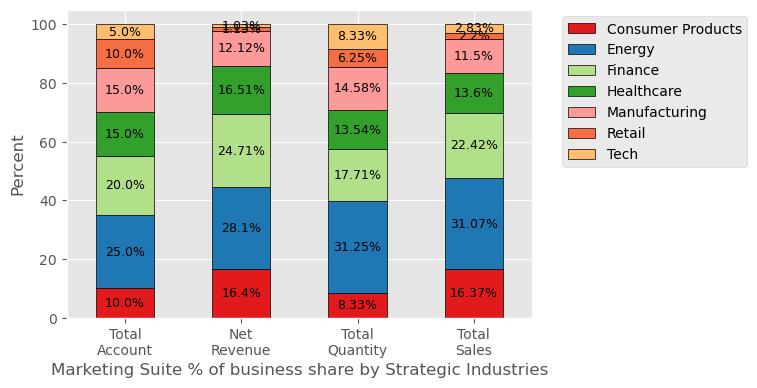

In [40]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod9_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Marketing Suite % of business share by Strategic Industries')
plt.ylabel('Percent')

- Energy industry leads in Total Accounts (25.00%), Net Revenue (28.10%), Total Quantity (31.25%), and Total Sales (31.07%).
- Finance industry holds a substantial share with 20.00% of Total Accounts, 24.71% of Net Revenue, and 22.42% of Total Sales.
- Consumer Products and Healthcare industries show moderate shares across all categories, with Consumer Products having notable Net Revenue (16.40%) and Total Sales (16.37%).
- Manufacturing maintains a consistent share in Total Accounts (15.00%) and contributes moderately to Net Revenue (12.12%) and Total Sales (11.50%).
- Retail and Tech industries have lower shares across the categories, with Retail showing particularly low Net Revenue (1.13%) and Total Sales (2.20%).

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Consumer Products'),
  Text(1, 0, 'Energy'),
  Text(2, 0, 'Finance'),
  Text(3, 0, 'Healthcare'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Retail'),
  Text(6, 0, 'Tech')])

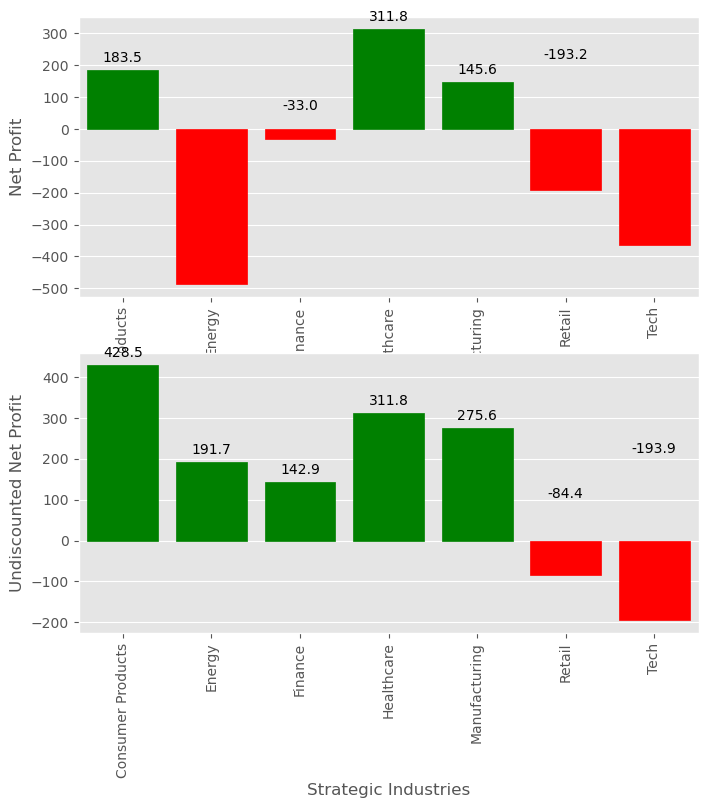

In [41]:
# Marketing Suite net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod9_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod9_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Energy industry, leading in Total Accounts (25.00%), Net Revenue (28.10%), and Total Sales (31.07%), surprisingly shows a negative Net Profit of -485.8383, despite a positive Net Profit Before Discount of 191.7077. The Finance industry, with substantial shares in Total Accounts (20.00%) and Net Revenue (24.71%), also has a negative Net Profit of -32.9876, although its Net Profit Before Discount is 142.8583.
- Consumer Products stands out with a Net Profit Before Discount of 428.5149 and a positive Net Profit of 183.4704, despite holding only 10.00% of Total Accounts and contributing 16.40% to Net Revenue. Healthcare, with 15.00% of Total Accounts and 16.51% of Net Revenue, shows strong financial performance with a Net Profit Before Discount of 311.8182 and a matching positive Net Profit of 311.8182.
- Manufacturing maintains a consistent presence across categories and shows positive financial results with a Net Profit Before Discount of 275.6052 and a Net Profit of 145.6104. Retail and Tech industries, despite lower shares in Total Accounts and Net Revenue, both report negative Net Profits of -193.1764 and -363.5280, respectively, indicating challenges in profitability.

In summary, the Healthcare and Consumer Products industries are the top performers within the Strategic segment of the Marketing Suite, demonstrating strong profitability. Energy and Finance, despite their significant presence, face profitability challenges. The Manufacturing industry also contributes positively, while Retail and Tech need considerable improvements to enhance their financial performance.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

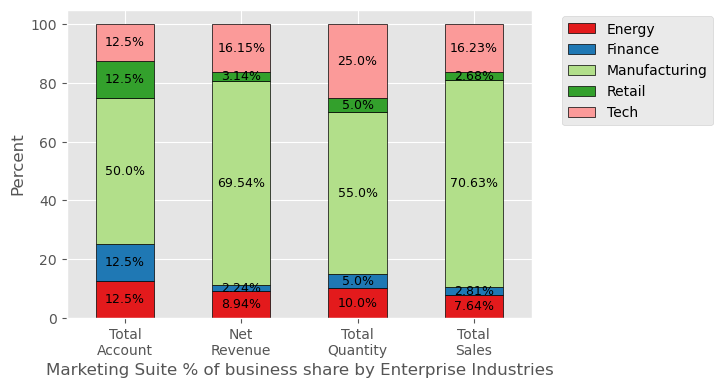

In [42]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod9_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Marketing Suite % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Manufacturing dominates in Total Accounts (50.00%), Net Revenue (69.54%), Total Quantity (55.00%), and Total Sales (70.63%), indicating a significant presence in the Enterprise segment.
- Tech holds a notable share with 12.50% of Total Accounts, 16.15% of Net Revenue, 25.00% of Total Quantity, and 16.23% of Total Sales.
- Energy, Finance, and Retail each account for 12.50% of Total Accounts, with Energy showing relatively higher Net Revenue (8.94%) and Total Sales (7.64%) compared to Finance and Retail.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Energy'),
  Text(1, 0, 'Finance'),
  Text(2, 0, 'Manufacturing'),
  Text(3, 0, 'Retail'),
  Text(4, 0, 'Tech')])

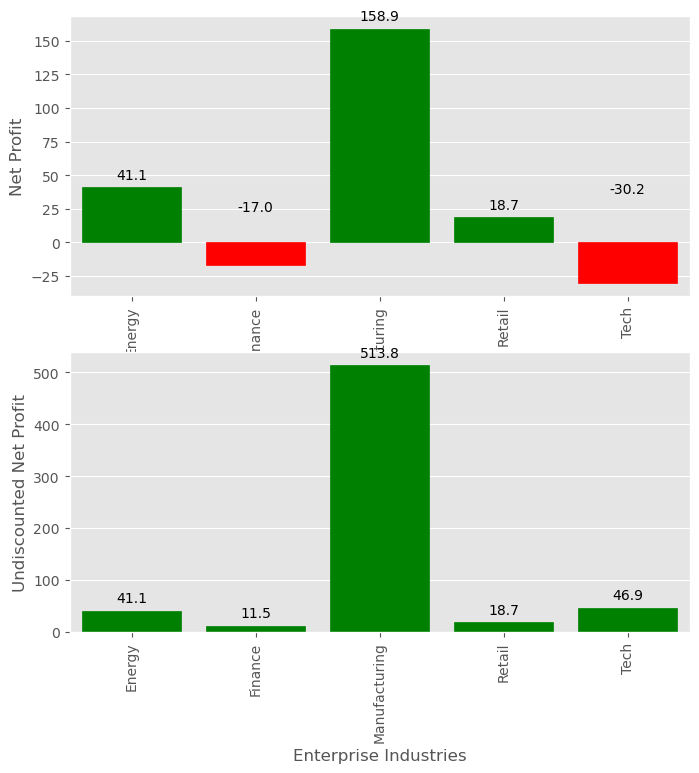

In [43]:
# Marketing Suite net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod9_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod9_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Manufacturing industry dominates the Enterprise segment, holding 50.00% of Total Accounts and leading in Net Revenue (69.54%), Total Quantity (55.00%), and Total Sales (70.63%). It shows strong financial performance with a Net Profit Before Discount of 513.8487 and a positive Net Profit of 158.9356. Meanwhile, the Energy industry, although contributing only 12.50% of Total Accounts, also demonstrates solid profitability with a Net Profit Before Discount of 41.1332 and matching positive Net Profit.
- Tech holds a significant share in Net Revenue (16.15%) and Total Sales (16.23%), yet struggles with a negative Net Profit of -30.2450 despite a Net Profit Before Discount of 46.8797. Similarly, the Finance industry, with a lower presence across categories, reports a negative Net Profit of -17.0274. Finally, the Retail industry maintains a minimal share but achieves a positive Net Profit of 18.6956.

In summary, the Manufacturing and Energy industries are the top performers within the Enterprise segment of the Marketing Suite, showing strong contributions in both revenue and profitability. The Tech and Finance industries, despite their presence, face challenges in maintaining profitability. The Retail industry, although less significant in share, manages to achieve positive financial results.

1. SMB segment, while hugely dominant with 63.16% of Total Accounts, needs special attention to address its negative net profit (-300) despite an Undiscounted Net Profit of 2,454.2. The Strategic segment also requires focus, holding 26.32% of Total Accounts with a negative net profit of -350 and an Undiscounted Net Profit of 1,072.2. The Enterprise segment, with 10.53% of Total Accounts, is performing well with a positive net profit of 171.5 and an Undiscounted Net Profit of 632.0. Prioritize enhancing profitability in the SMB and Strategic segments, while maintaining the performance of the Enterprise segment.

### Regional EDA

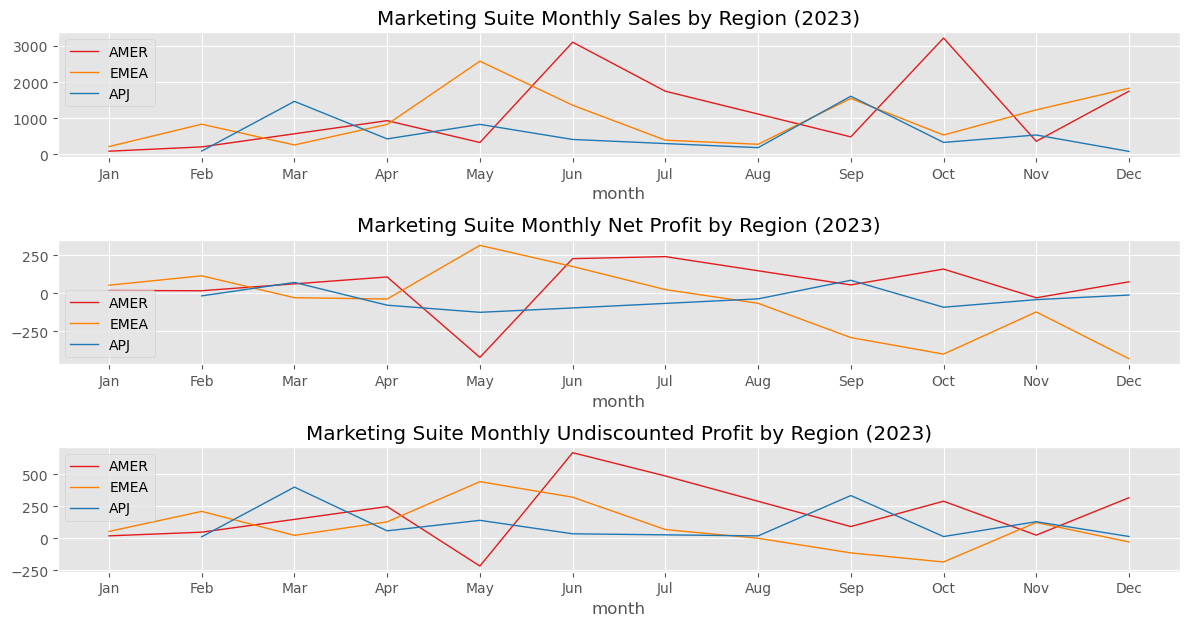

In [13]:
# Marketing Suite Monthly Income EDA by Region (2023)
prod9_region_month = prod9_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod9_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod9_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod9_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Marketing Suite Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod9_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod9_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod9_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Marketing Suite Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod9_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod9_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod9_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Marketing Suite Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

EMEA peaks in sales during February, May, and December. APJ shows strong sales in March and September, while AMER peaks in June and October. Net profits vary significantly: AMER generally shows higher net profits but suffers from discounts; APJ often has negative net profits due to discounts, especially early in the year; and EMEA's net profits are mixed, with significant impacts from discounts later in the year.
- AMER region demonstrates robust sales and net profit in June, July and October. Discounts have a significant impact on profits in various months, particularly in May, where the net profit turned negative.
- EMEA region exhibits strong sales in May, September, and December. However, it faces significant impacts from discounts, particularly in months like October and December, leading to negative net profits.
- APJ region shows strong sales in March, May, and September. However, significant discounts in several months, such as February, April, and May, lead to negative net profits.

Performance Highlights
- Highest Sales: In AMER, June shows the highest sales of 3104.17.
- Highest Net Profit: The highest net profit is seen in EMEA, May, with a net profit of 315.54.
- Highest Undiscounted Profit: AMER in June also shows the highest undiscounted profit at 667.63.

In [14]:
prod9_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,1,1,84.9800,84.9800,18.6956,18.6956
1,AMER,2,2,203.9830,173.3855,47.3961,16.7986
2,AMER,4,16,930.4780,790.9063,247.1089,107.5372
3,AMER,5,11,325.9390,120.9737,-216.9366,-421.9019
4,AMER,6,19,3104.1745,2664.7113,667.6295,228.1663
5,AMER,7,10,1746.1240,1501.5994,485.9002,241.3756
6,AMER,9,4,481.6260,445.6761,91.1811,55.2312
7,AMER,10,14,3219.2110,3089.5613,289.0104,159.3608
8,AMER,11,3,359.4990,305.5742,24.3191,-29.6058
9,AMER,12,19,1746.8790,1506.1411,316.3707,75.6328


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

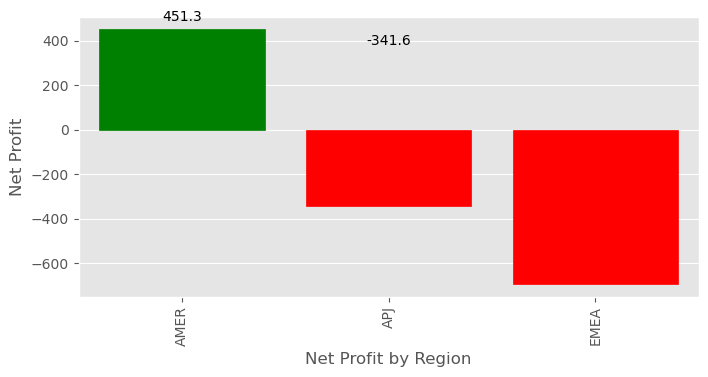

In [15]:
prod9_region = prod9_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod9_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [16]:
prod9_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,99,12202.8935,10683.5090,1970.6749,451.2904
1,APJ,49,5950.5572,4458.5178,1150.4682,-341.5712
2,EMEA,128,11870.8290,10140.1497,1037.3340,-693.3453


High-Performing Region
- AMER leads in both sales and net profit, indicating strong overall performance.
- While sales figures are impressive, frequent and substantial discounts erode profit margins, leading to lower net profits.

Mixed Performance
- EMEA follows closely in sales but has the lowest net profit. This highlights that high sales doesn't mean high profits: discounts or higher costs has had an impact.
- While achieving strong sales figures in months like May and December, EMEA struggles significantly with the impact of discounts leading to negative net profits.

Challenging Region
- APJ has the lowest sales and negative net profit, highlighting challenges in profitability despite moderate sales.
- Although the region shows potential with strong sales in certain months, the overall lower sales volume compared to other regions impacts the total revenue. In addition, the frequent occurrence of negative net profits due to discounts.

In [7]:
grouped = prod9_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [8]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

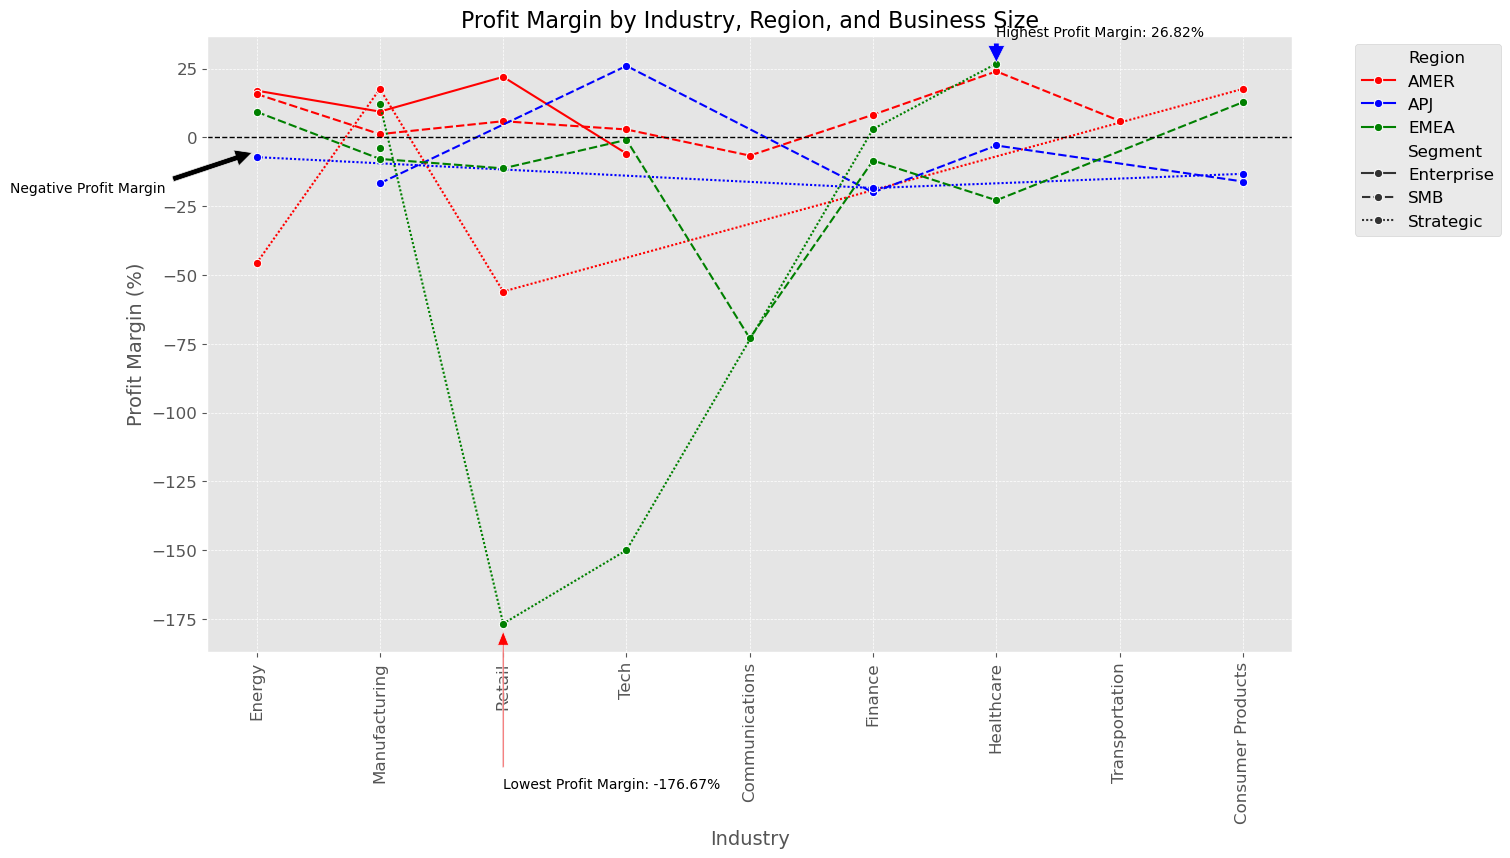

In [9]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Annotate the plot with an arrow pointing outside the chart
plt.annotate(
    'Negative Profit Margin', 
    xy=(0, -5),  # Point of the arrow
    xytext=(-2, -20),  # Position of the text
    arrowprops=dict(facecolor='black', shrink=0.05)
)

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit - 60),  # Move text position to point arrow downwards
    arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=8, headlength=10)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [10]:
prod9_2023[(prod9_2023['Region'] == 'EMEA') & (prod9_2023['Industry'] == 'Retail') & (prod9_2023['Segment'] == 'Strategic') & (prod9_2023['net_profit'] < 0)]

,Order ID,Order Date,Date Key,Customer ID,Customer,Segment,Industry,Region,Subregion,Country,City,Product,Sales,Quantity,Discount,net_profit,total_discount_in_dollars,selling_price,(net)_profit_before_discount,net_profit_per_unit_sold,profit_margin,discounted_sales,month,year,year_month
6121,EMEA-2023-143378,2023-09-20,20230920,1096,Walmart,Strategic,Retail,EMEA,EU-WEST,Belgium,Brussels,Marketing Suite,72.5880,2,0.7000,-128.2388,50.8116,36.2940,-77.4272,-64.1194,-176.6667,21.7764,9,2023,2023-09


In [11]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
avg_discount = grouped['Discount'].mean()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit,
    'avg_discount': avg_discount
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])

#### Cross-segment SMB

In [12]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

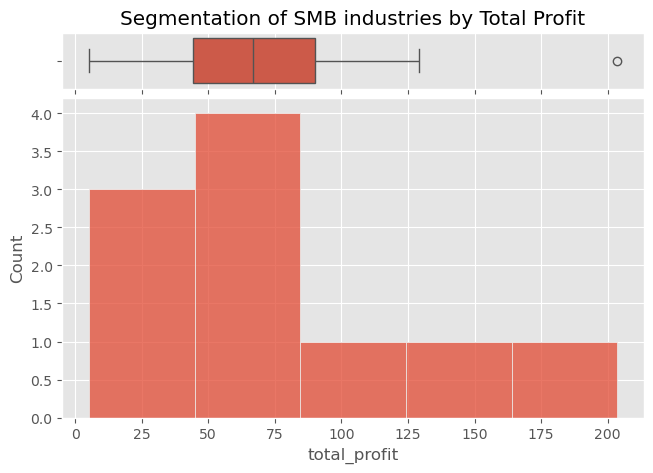

0.0000     5.1294
0.2500    44.0740
0.5000    66.8092
0.7500    90.2158
1.0000   203.5644
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 90.22 in profit
- 3 (Good) : Contributes between 66.81 and 90.22 in profit
- 2 (Marginal) : Contributes between 44.07 and 66.81 in profit
- 1 (Underperforming) : Contributes less than 44.07 in profit


In [13]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [14]:
smb_positive_profit_metrics['segmentation score'] = pd.qcut(
    smb_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
21,APJ,SMB,Tech,203.5644,0.0000,4
11,AMER,SMB,Transportation,129.2940,0.0000,4
5,AMER,SMB,Energy,95.0898,0.0500,4
6,AMER,SMB,Finance,75.5937,0.1500,3
27,EMEA,SMB,Consumer Products,69.6762,0.1000,3
28,EMEA,SMB,Energy,63.9422,0.2333,2
10,AMER,SMB,Tech,50.7138,0.1125,2
7,AMER,SMB,Healthcare,41.8608,0.0000,1
9,AMER,SMB,Retail,14.0980,0.1500,1
8,AMER,SMB,Manufacturing,5.1294,0.1500,1


In [15]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Tech in APJ, Transportation in AMER, Energy in AMER are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Finance in AMER, Consumer Products in EMEA all maintain solid profitability.
While not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Energy in EMEA, Tech in AMER, Healthcare in AMER, Retail in AMER, Manufacturing in AMER are underperforming.
These SMB industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [16]:
###Filter negative profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_negative_profit_metrics = smb_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

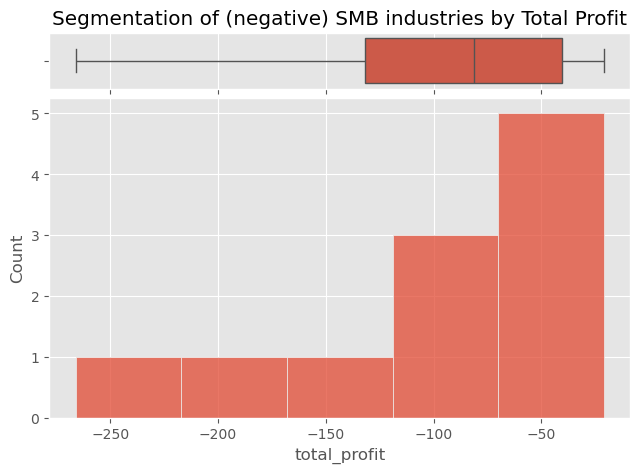

0.0000   -266.0796
0.2500   -131.9697
0.5000    -81.4410
0.7500    -40.3793
1.0000    -21.0058
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -131.97 in profit
- 3 (Significant) : Loses between -131.97 and -81.44 in profit
- 2 (Negative) : Loses between -81.44 and -40.38 in profit
- 1 (Marginal) : Loses less than -40.38 in profit


In [17]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [18]:
smb_negative_profit_metrics['segmentation score'] = pd.qcut(
    smb_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

smb_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
26,EMEA,SMB,Communications,-266.0796,0.4500,4
29,EMEA,SMB,Finance,-178.9427,0.2444,4
30,EMEA,SMB,Healthcare,-146.1260,0.3000,4
17,APJ,SMB,Consumer Products,-117.8134,0.3200,3
20,APJ,SMB,Manufacturing,-102.4900,0.3200,3
32,EMEA,SMB,Retail,-81.4410,0.2000,3
31,EMEA,SMB,Manufacturing,-44.6940,0.2000,2
4,AMER,SMB,Communications,-44.0842,0.1500,2
18,APJ,SMB,Finance,-36.6744,0.3000,1
19,APJ,SMB,Healthcare,-30.0980,0.3200,1


Communications, Finance, and Healthcare in EMEA contribute significant losses to the SMB segment (-266.0796, -178.9427, and -146.1260, respectively). These losses outweigh the gains from the top-performing SMB industries: Tech in APJ (203.5644), Transportation in AMER (129.2940), and Energy in AMER (95.0898).

In [19]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_negative_profit_metrics[smb_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "are SMB industries contributing to substantial losses and are considered high-risk.\nStrategic improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "all suffer notable losses.\nCareful analysis and targeted strategies are essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")

Communications in EMEA, Finance in EMEA, Healthcare in EMEA are SMB industries contributing to substantial losses and are considered high-risk.
Strategic improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Consumer Products in APJ, Manufacturing in APJ, Retail in EMEA all suffer notable losses.
Careful analysis and targeted strategies are essential to stabilize and mitigate further declines.

Manufacturing in EMEA, Communications in AMER, Finance in APJ, Healthcare in APJ, Tech in EMEA incur moderate losses.
They require attention to prevent slipping into more significant losses.



In [ ]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the SMB segment
total_metrics_SMB = prod9.query("Segment == 'SMB'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with (and net_profit < 0) filter 
prod9_2023_industry_region_SMB = prod9.query("Segment == 'SMB' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
SMB_account = prod9.query("Segment == 'SMB'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod9_2023_percents_SMB = SMB_account.merge(prod9_2023_industry_region_SMB, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod9_2023_percents_SMB = prod9_2023_percents_SMB.dropna()

# Calculate percentages
prod9_2023_percents_SMB['% Account'] = prod9_2023_percents_SMB['account'] / SMB_account['account'].sum() * 100
prod9_2023_percents_SMB['% Quantity'] = prod9_2023_percents_SMB['Quantity'] / total_metrics_SMB['Quantity'] * 100
prod9_2023_percents_SMB['% Sales'] = prod9_2023_percents_SMB['Sales'] / total_metrics_SMB['Sales'] * 100
prod9_2023_percents_SMB['% Net Revenue'] = prod9_2023_percents_SMB['discounted_sales'] / total_metrics_SMB['discounted_sales'] * 100

# Filter data for specific industries and regions
specific_industries = ['Communications', 'Finance', 'Healthcare']
specific_regions = ['EMEA']
filtered_SMB = prod9_2023_percents_SMB[(prod9_2023_percents_SMB['Industry'].isin(specific_industries)) & 
                                       (prod9_2023_percents_SMB['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_SMB.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

To assess the impact of high discounts on net profits, I compared two datasets: one without a filter for negative profits and another with a filter for net profits less than zero.

In [28]:
# to see detailed Discounted orders for the SMB "Severe" Category
filtered_SMB2 = prod9_2023[(prod9_2023['Industry'].isin(specific_industries)) & (prod9_2023['Region'].isin(specific_regions)) ]
filtered_SMB3 = filtered_SMB2[filtered_SMB2['Segment'] == 'SMB']
grouped_data = filtered_SMB3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [29]:
# Dataset Without Filter
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Communications,EMEA,0.2000,1
1,Communications,EMEA,0.7000,1
2,Finance,EMEA,0.0000,2
3,Finance,EMEA,0.2000,5
4,Finance,EMEA,0.5000,1
5,Finance,EMEA,0.7000,1
6,Healthcare,EMEA,0.0000,1
7,Healthcare,EMEA,0.2000,1
8,Healthcare,EMEA,0.7000,1


In [ ]:
# Dataset With Filter (prod9_2023['net_profit'] < 0) 
filtered_SMB2 = prod9_2023[(prod9_2023['Industry'].isin(specific_industries)) & (prod9_2023['Region'].isin(specific_regions)) & (prod9_2023['net_profit'] < 0) ]
filtered_SMB3 = filtered_SMB2[filtered_SMB2['Segment'] == 'SMB']
grouped_data = filtered_SMB3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [31]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Communications,EMEA,0.2000,1
1,Communications,EMEA,0.7000,1
2,Finance,EMEA,0.2000,2
3,Finance,EMEA,0.5000,1
4,Finance,EMEA,0.7000,1
5,Healthcare,EMEA,0.2000,1
6,Healthcare,EMEA,0.7000,1


By comparing the two datasets, I identified orders with negative net profits. This analysis showed that higher discounts (0.7000) consistently appeared in both datasets, particularly in the filtered one for negative profits. Additionally, some orders with 20% discounts also resulted in losses, indicating that even moderate discounts can lead to negative profits if not carefully calculated.

Negative profits are thus associated with discounted orders, suggesting these discounts may have been applied without thorough profitability assessments. Proper evaluations should include analyzing the impact on net margins, understanding the cost structure, assessing customer acquisition costs, and ensuring the discount strategy aligns with overall financial goals. Thorough calculations would help ensure discounts contribute positively to profitability rather than resulting in losses.

#### Cross-segment Strategic

In [33]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

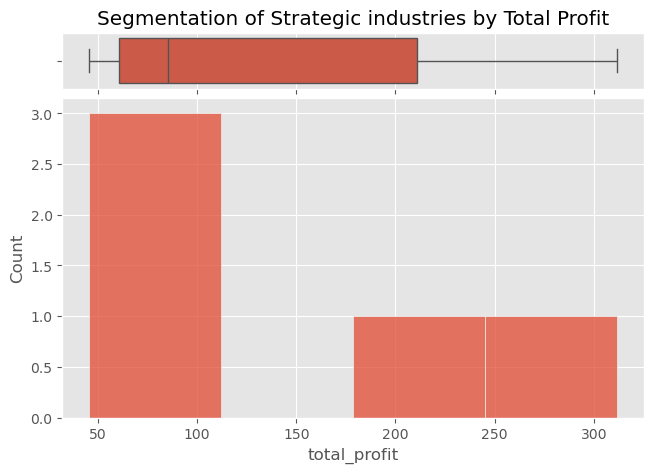

0.0000    45.3572
0.2500    60.4344
0.5000    85.1760
0.7500   210.7350
1.0000   311.8182
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 210.74 in profit
- 3 (Good) : Contributes between 85.18 and 210.74 in profit
- 2 (Marginal) : Contributes between 60.43 and 85.18 in profit
- 1 (Underperforming) : Contributes less than 60.43 in profit


In [34]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [35]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
35,EMEA,Strategic,Healthcare,311.8182,0.0000,4
12,AMER,Strategic,Consumer Products,210.7350,0.1500,3
14,AMER,Strategic,Manufacturing,85.1760,0.1500,2
36,EMEA,Strategic,Manufacturing,60.4344,0.1000,1
34,EMEA,Strategic,Finance,45.3572,0.1000,1


In [37]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "is the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "maintain solid profitability.\nWhile not the highest-performing, this Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Healthcare in EMEA is the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Consumer Products in AMER maintain solid profitability.
While not the highest-performing, this Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Manufacturing in AMER, Manufacturing in EMEA, Finance in EMEA are underperforming.
These Strategic industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [38]:
###Filter negative profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Strategic segment
strategic_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_negative_profit_metrics = strategic_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

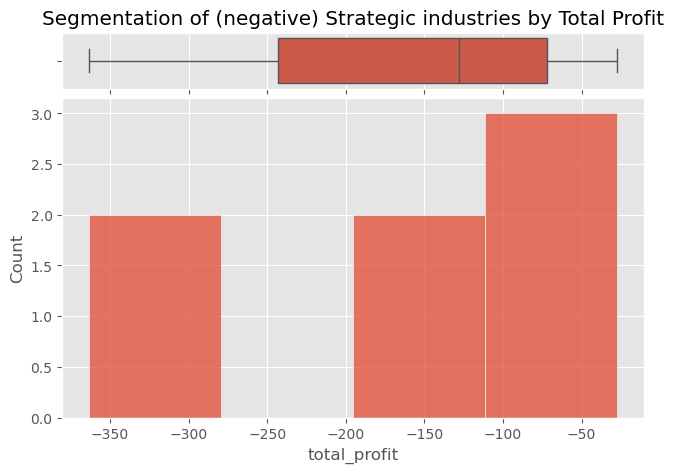

0.0000   -363.5280
0.2500   -242.9192
0.5000   -128.2388
0.7500    -71.6412
1.0000    -27.2646
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -242.92 in profit
- 3 (Significant) : Loses between -242.92 and -128.24 in profit
- 2 (Negative) : Loses between -128.24 and -71.64 in profit
- 1 (Marginal) : Loses less than -71.64 in profit


In [39]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [40]:
strategic_negative_profit_metrics['segmentation score'] = pd.qcut(
    strategic_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

strategic_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
38,EMEA,Strategic,Tech,-363.5280,0.7000,4
13,AMER,Strategic,Energy,-350.4153,0.4250,4
23,APJ,Strategic,Energy,-135.4230,0.2067,3
37,EMEA,Strategic,Retail,-128.2388,0.7000,3
24,APJ,Strategic,Finance,-78.3448,0.3200,2
15,AMER,Strategic,Retail,-64.9376,0.5000,1
22,APJ,Strategic,Consumer Products,-27.2646,0.3200,1


Tech in EMEA and Energy in AMER contribute significant losses to the Strategic segment (-363.5280 and -350.4153, respectively). These losses outweigh the gains from the top-performing Strategic industries: Healthcare in EMEA (311.8182).

In [41]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_negative_profit_metrics[strategic_negative_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")


list_industries_by_score([4], "are Strategic industries contributing to substantial losses and are considered high-risk.\nKey improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.\n")
list_industries_by_score([3], "all suffer notable losses.\nCareful analysis and targeted strategies are essential to stabilize and mitigate further declines.\n")
list_industries_by_score([1, 2], "incur moderate losses.\nThey require attention to prevent slipping into more significant losses.\n")

Tech in EMEA, Energy in AMER are Strategic industries contributing to substantial losses and are considered high-risk.
Key improvements and efficiency measures should be prioritized over heavy marketing and discounting efforts.

Energy in APJ, Retail in EMEA all suffer notable losses.
Careful analysis and targeted strategies are essential to stabilize and mitigate further declines.

Finance in APJ, Retail in AMER, Consumer Products in APJ incur moderate losses.
They require attention to prevent slipping into more significant losses.



In [43]:
# query for percentage loss if industries in the "Severe" category is cut off
# Calculate total metrics for the Strategic segment
total_metrics_Strategic = prod9_2023.query("Segment == 'Strategic'")[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].sum()

# Aggregate data by Industry and Region with net_profit < 0 filter <------------change to see total share 
prod9_2023_industry_region_Strategic = prod9_2023.query("Segment == 'Strategic' and net_profit < 0").groupby(['Industry', 'Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum').reset_index()

# Count unique Order IDs by Industry and Region
Strategic_account = prod9_2023.query("Segment == 'Strategic'").groupby(['Industry', 'Region'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','Region','account']

# Merge dataframes and calculate percentages
prod9_2023_percents_Strategic = Strategic_account.merge(prod9_2023_industry_region_Strategic, how='left', on=['Industry', 'Region'])

# Drop rows with NaN values
prod9_2023_percents_Strategic = prod9_2023_percents_Strategic.dropna()

# Calculate percentages
prod9_2023_percents_Strategic['% Account'] = prod9_2023_percents_Strategic['account'] / Strategic_account['account'].sum() * 100
prod9_2023_percents_Strategic['% Quantity'] = prod9_2023_percents_Strategic['Quantity'] / total_metrics_Strategic['Quantity'] * 100
prod9_2023_percents_Strategic['% Sales'] = prod9_2023_percents_Strategic['Sales'] / total_metrics_Strategic['Sales'] * 100
prod9_2023_percents_Strategic['% Net Revenue'] = prod9_2023_percents_Strategic['discounted_sales'] / total_metrics_Strategic['discounted_sales'] * 100

# Filter data for specific industries and regions
specific_industries = ['Tech', 'Energy'] 
specific_regions = ['AMER', 'EMEA']
filtered_Strategic = prod9_2023_percents_Strategic[(prod9_2023_percents_Strategic['Industry'].isin(specific_industries)) & 
                                       (prod9_2023_percents_Strategic['Region'].isin(specific_regions))]

# Group by Industry and Region to get the percentages
filtered_percentages = filtered_Strategic.groupby(['Industry', 'Region'])[['% Account', '% Quantity', '% Sales', '% Net Revenue']].sum()

In [57]:
# to see detailed Discounted orders for the Strategic "Severe" Category
filtered_Strategic2 = prod9_2023[(prod9_2023['Industry'].isin(specific_industries)) & (prod9_2023['Region'].isin(specific_regions)) ]
filtered_Strategic3 = filtered_Strategic2[filtered_Strategic2['Segment'] == 'Strategic']
grouped_data = filtered_Strategic3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [58]:
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Energy,AMER,0.1500,1
1,Energy,AMER,0.7000,1
2,Tech,EMEA,0.7000,1


In [59]:
# to see detailed Discounted orders for the Strategic "Severe" Category
filtered_Strategic2 = prod9_2023[(prod9_2023['Industry'].isin(specific_industries)) & (prod9_2023['Region'].isin(specific_regions)) & (prod9_2023['net_profit'] < 0) ]
filtered_Strategic3 = filtered_Strategic2[filtered_Strategic2['Segment'] == 'Strategic']
grouped_data = filtered_Strategic3.groupby(['Industry', 'Region', 'Discount'])['Order ID'].count().reset_index()
grouped_data.columns = ['Industry', 'Region', 'Discount', 'Order ID (count)']

In [60]:
# with (prod9_2023['net_profit'] < 0) filter
grouped_data

,Industry,Region,Discount,Order ID (count)
0,Energy,AMER,0.7000,1
1,Tech,EMEA,0.7000,1


By comparing the two datasets, I identified which orders had negative net profits. This comparison highlighted that orders with higher discounts (0.7000) appeared in both datasets, especially in the filtered one for negative profits.

Again, it can be observed that negative profits are associated with high discounted orders, suggesting that these discounts may have been applied without thorough calculations of profitability. This includes evaluating the impact on net margins, understanding the cost structure, assessing customer acquisition costs, and ensuring that the discount strategy aligns with overall financial goals.

#### Cross-segment Enterprise

In [49]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

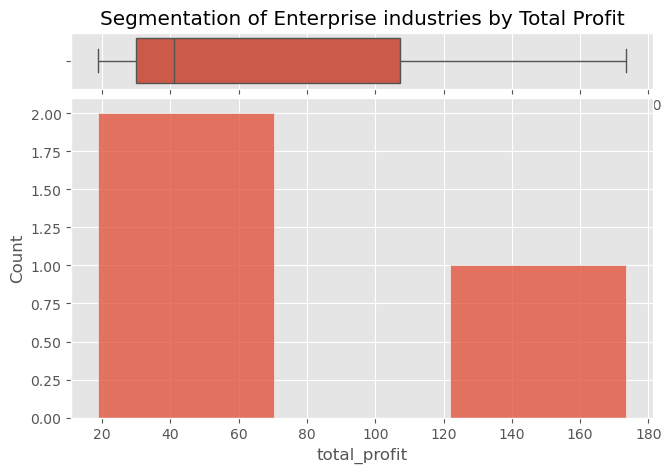

0.0000    18.6956
0.2500    29.9144
0.5000    41.1332
0.7500   107.2932
1.0000   173.4532
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 107.29 in profit
- 3 (Good) : Contributes between 41.13 and 107.29 in profit
- 2 (Marginal) : Contributes between 29.91 and 41.13 in profit
- 1 (Underperforming) : Contributes less than 29.91 in profit


In [50]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")

In [51]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
1,AMER,Enterprise,Manufacturing,173.4532,0.1500,4
0,AMER,Enterprise,Energy,41.1332,0.0000,2
2,AMER,Enterprise,Retail,18.6956,0.0000,1


In [54]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_positive_profit_metrics[enterprise_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "is the highest performing industries in the Enterprise segment.\nThe industry is strategic for customer engagement and product improvement, making it prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Enterprise industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Manufacturing in AMER is the highest performing industries in the Enterprise segment.
The industry is strategic for customer engagement and product improvement, making it prime targets for marketing investments and discount allocations to drive growth.

Energy in AMER, Retail in AMER are underperforming.
These Enterprise industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [55]:
###Filter negative profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_negative_profit_metrics = enterprise_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

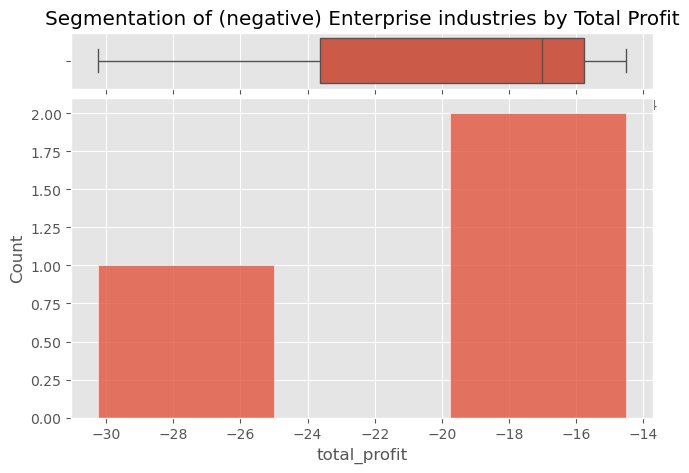

0.0000   -30.2450
0.2500   -23.6362
0.5000   -17.0274
0.7500   -15.7725
1.0000   -14.5176
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -23.64 in profit
- 3 (Significant) : Loses between -23.64 and -17.03 in profit
- 2 (Negative) : Loses between -17.03 and -15.77 in profit
- 1 (Marginal) : Loses less than -15.77 in profit


In [56]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [61]:
enterprise_negative_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

enterprise_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
3,AMER,Enterprise,Tech,-30.2450,0.1500,4
16,APJ,Enterprise,Finance,-17.0274,0.3200,3
25,EMEA,Enterprise,Manufacturing,-14.5176,0.2000,1


Manufacturing in AMER leads with a substantial profit of 173.4532, whereas Tech in AMER shows a smaller loss at -30.2450. Despite some losses, the gains significantly outweigh them, highlighting strong overall performance in the Enterprise segment.

Although losses from the Enterprise segment are not as substantial as those from other segments, it's important to address them. Simple steps include reviewing pricing strategies to avoid deep discounts, cutting unnecessary costs, improving operational efficiency, focusing on high-margin products, retaining existing customers, and regularly monitoring performance to quickly identify and solve issues.

**Key findings:**
1. AMER demonstrates robust sales and net profits, especially in June and October, but suffers from significant discount impacts, leading to lower net profits in various months. AMER is the highest earner overall.
2. EMEA exhibits strong sales in May, September, and December, but faces significant negative impacts from discounts, particularly in October and December.
3. APJ shows strong sales in March, May, and September, but frequently experiences negative net profits due to substantial discounts in several months.
4. In the SMB segment, high-performing industries include Tech in APJ, Transportation in AMER, and Energy in AMER. However, some industries like Communications, Finance, and Healthcare in EMEA contribute significant losses.
5. In the Strategic segment, top-performing industries are Healthcare in EMEA and Finance in AMER. However, Tech and Energy, particularly in EMEA and AMER, face significant losses. Key improvements and efficiency measures are needed to mitigate these losses.
6. In the Enterprise segment, Manufacturing in AMER leads with substantial profits, while Tech in AMER shows losses. Overall, gains in the Enterprise segment outweigh the losses, but addressing underperformance in some industries remains crucial.